In [2772]:
import pandas as pd
import numpy as np
import scipy.stats as sps
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import math
from scipy.stats.stats import pearsonr 
from scipy.stats import shapiro
import seaborn as sns 
from scipy import stats
import scipy


In [2773]:
import warnings
warnings.filterwarnings("ignore")

In [2774]:
# Загрузка данных
frame1 = pd.ExcelFile('Датасет.xlsx')
frame = frame1.parse('final')
frame = frame.fillna(0)
frame

,инн,год (финансы),дефолт,Наименование,Адрес (место нахождения),"Возраст компании, лет",Организационно-правовая форма,Форма собственности,Размер компании,Среднесписочная численность работников,...,Unnamed: 197,Инфляция,Торговый баланс (млн. дол.),Кризис (2014-2015),Кредитный рейтинг SnP (на конец года),Индекс эк. Свободы,Индекс восприятия коррупции,курс доллара (сред. за год),Unnamed: 205,Москва
0,1027739477259,2015,0.0,"АБСОЛЮТ ЛИЗИНГ, ООО","127051, г. Москва, бульвар Цветной, д. 18 (Биз...",14.5,Общества с ограниченной ответственностью,Частная собственность,Малые предприятия,0,...,0.0,12.91,148397.93,1,11,52.1,29,61.319435,0.0,1
1,1027739477259,2016,0.0,"АБСОЛЮТ ЛИЗИНГ, ООО","127051, г. Москва, бульвар Цветной, д. 18 (Биз...",15.5,Общества с ограниченной ответственностью,Частная собственность,Малые предприятия,0 - 5,...,0.0,5.39,90214.70,0,11,50.6,29,66.833472,0.0,1
2,1027739477259,2017,0.0,"АБСОЛЮТ ЛИЗИНГ, ООО","127051, г. Москва, бульвар Цветной, д. 18 (Биз...",16.5,Общества с ограниченной ответственностью,Частная собственность,Малые предприятия,16,...,0.0,2.51,114557.53,0,11,57.1,29,58.298185,0.0,1
3,1027739477259,2018,0.0,"АБСОЛЮТ ЛИЗИНГ, ООО","127051, г. Москва, бульвар Цветной, д. 18 (Биз...",17.5,Общества с ограниченной ответственностью,Частная собственность,Малые предприятия,14,...,0.0,4.26,195057.81,0,10,58.2,28,62.926389,0.0,1
4,1027739477259,2019,0.0,"АБСОЛЮТ ЛИЗИНГ, ООО","127051, г. Москва, бульвар Цветной, д. 18 (Биз...",18.5,Общества с ограниченной ответственностью,Частная собственность,Малые предприятия,12,...,0.0,3.04,165251.68,0,10,58.9,28,64.618432,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,1197746085206,2019,0.0,"АРКТИК ЛИЗИНГ-3, ООО","111250, г. Москва, проезд Завода Серп И Молот,...",1.0,Общества с ограниченной ответственностью,Частная собственность,0,0,...,0.0,3.04,165251.68,0,10,58.9,28,64.618432,0.0,1
1069,1187746791066,2019,0.0,"АРКТИК ЛИЗИНГ, ООО","111250, г. Москва, проезд Завода Серп И Молот,...",1.5,Общества с ограниченной ответственностью,Частная собственность,0,0,...,0.0,3.04,165251.68,0,10,58.9,28,64.618432,0.0,1
1070,1193668013362,2019,0.0,"АЙС БЕРД, ООО","394066, Воронежская обл., г. Воронеж, проспект...",0.5,Общества с ограниченной ответственностью,Частная собственность,Микропредприятия,0,...,0.0,3.04,165251.68,0,10,58.9,28,64.618432,0.0,0
1071,1026605401646,2019,0.0,"АС ФИНАНС, ООО","620026, Свердловская обл., г. Екатеринбург, ул...",17.0,Общества с ограниченной ответственностью,Частная собственность,Малые предприятия,0,...,0.0,3.04,165251.68,0,10,58.9,28,64.618432,0.0,0


In [2775]:
# Создание датасета с нужными переменными
Working = frame[['Наименование', 'дефолт', 'год (финансы)', 'Возраст компании, лет', 'Москва']]

# Расчет финансовых коэффициентов
Working.loc[:, 'Покрытие долга'] = (frame['Доходные вложения в материальные ценности, RUB'] + frame['Дебиторская задолженность, RUB'])/(frame['Заёмные средства (долгосрочные), RUB']+frame['Заёмные средства (краткосрочные), RUB']-frame['Денежные средства и денежные эквиваленты, RUB'])
Working.loc[:, 'Покрытие процентных расходов'] = frame['Прибыль (убыток) до налогообложения , RUB'] / frame['Проценты к уплате, RUB']
Working.loc[:, 'Уровень капитала'] = frame['Капитал и резервы, RUB'] / frame['Активы  всего, RUB']
Working.loc[:, 'Доля нерабочих активов в активах'] = (frame['Нематериальные активы, RUB'] + frame['Основные средства , RUB'] + frame['Отложенные налоговые активы, RUB'] + frame['Прочие внеоборотные активы, RUB'] + frame['НДС по приобретенным ценностям , RUB'] + frame['Дебиторская задолженность, RUB'] + frame['Денежные средства и денежные эквиваленты, RUB']) / frame['Активы  всего, RUB']
Working.loc[:, 'CIR'] = (frame['Себестоимость продаж, RUB'] + frame['Коммерческие расходы, RUB'] + frame['Управленческие расходы, RUB']) / frame['Выручка, RUB']
Working.loc[:, 'Капитал к долгу'] = frame['Капитал и резервы, RUB'] / (frame['Заёмные средства (долгосрочные), RUB']+frame['Заёмные средства (краткосрочные), RUB'])
Working.loc[:, 'логарифм активов'] = np.log(frame['Активы  всего, RUB'])
Working.loc[:, 'Прочие оборотные активы в рабочих активах'] = frame['Прочие оборотные активы, RUB'] / (frame['Доходные вложения в материальные ценности, RUB'] + frame['Долгосрочные финансовые вложения, RUB'] + frame['Запасы, RUB'] + frame['Краткосрочные финансовые вложения, RUB'])
Working.loc[:, 'Dividend payout ratio'] = frame['Выплата дивидендов, RUB'] / frame['Чистая прибыль (убыток), RUB']
Working.loc[:, 'Current ratio'] = frame['Оборотные активы, RUB'] / frame['Краткосрочные обязательства, RUB']
Working.loc[:, 'ROE'] = frame['Чистая прибыль (убыток), RUB'] / frame['Активы  всего, RUB']
Working.loc[:, 'ROA'] = frame['Чистая прибыль (убыток), RUB'] / frame['Капитал и резервы, RUB']
Working.loc[:, 'Sustainable growth rate'] = Working['ROE'] * (1 - Working['Dividend payout ratio'])
Working.loc[:, 'Уровень перманентного капитала'] = (frame['Капитал и резервы, RUB'] + frame['Заёмные средства (долгосрочные), RUB']) / frame['Активы  всего, RUB']
Working.loc[:, 'EBIT к доходу'] = frame['EBIT, RUB'] / frame['Выручка, RUB']
Working.loc[:, 'EBIT к активам'] = frame['EBIT, RUB'] / frame['Активы  всего, RUB']
Working.loc[:, 'EBIT к доходу и прочему доходу'] = frame['EBIT, RUB'] / (frame['Выручка, RUB'] + frame['Прочие доходы, RUB'])                                                                                                                    
Working.loc[:, 'Ликвидность 2'] = (frame['Денежные средства и денежные эквиваленты, RUB'] + frame['Краткосрочные финансовые вложения, RUB']) / (frame['Заёмные средства (краткосрочные), RUB'] + frame['Кредиторская задолженность, RUB'])
Working.loc[:, 'Покрытие долга денежным потоком'] = frame['Сальдо денежных потоков от текущих операций, RUB'] / (frame['Заёмные средства (долгосрочные), RUB'] + frame['Заёмные средства (краткосрочные), RUB'])
Working.loc[:, 'Общая платежеспособность'] = (frame['Долгосрочные обязательства, RUB'] + frame['Краткосрочные обязательства, RUB'] - frame['Доходы будущих периодов , RUB']) / frame['Выручка, RUB']
Working.loc[:, 'Чистые инвестиции в лизинг'] = frame['Доходные вложения в материальные ценности, RUB'] + frame['Дебиторская задолженность, RUB']
Working.loc[:, 'Собственные средства'] = frame['Капитал и резервы, RUB']
Working.loc[:, 'Текущая долговая нагрузка'] = frame['Краткосрочные обязательства, RUB'] / frame['Активы  всего, RUB']    
Working.loc[:, 'Уровень капитала'] = frame['Капитал и резервы, RUB'] / frame['Активы  всего, RUB']

# Расчет финансовых коэффициентов для предыдущего года
Working.loc[:, 'пред. Покрытие долга'] = (frame['пред. Доходные вложения в материальные ценности, RUB'] + frame['пред. Дебиторская задолженность, RUB'])/(frame['пред. Заёмные средства (долгосрочные), RUB']+frame['пред. Заёмные средства (краткосрочные), RUB']-frame['пред. Денежные средства и денежные эквиваленты, RUB'])
Working.loc[:, 'пред. Покрытие процентных расходов'] = frame['пред. Прибыль (убыток) до налогообложения , RUB'] / frame['пред. Проценты к уплате, RUB']
Working.loc[:, 'пред. Уровень капитала'] = frame['пред. Капитал и резервы, RUB'] / frame['пред. Активы  всего, RUB']
Working.loc[:, 'пред. Доля нерабочих активов в активах'] = (frame['пред. Нематериальные активы, RUB'] + frame['пред. Основные средства , RUB'] + frame['пред. Отложенные налоговые активы, RUB'] + frame['пред. Прочие внеоборотные активы, RUB'] + frame['пред. НДС по приобретенным ценностям , RUB'] + frame['пред. Дебиторская задолженность, RUB'] + frame['пред. Денежные средства и денежные эквиваленты, RUB']) / frame['пред. Активы  всего, RUB']
Working.loc[:, 'пред. CIR'] = (frame['пред. Себестоимость продаж, RUB'] + frame['пред. Коммерческие расходы, RUB'] + frame['пред. Управленческие расходы, RUB']) / frame['пред. Выручка, RUB']
Working.loc[:, 'пред. Капитал к долгу'] = frame['пред. Капитал и резервы, RUB'] / (frame['пред. Заёмные средства (долгосрочные), RUB']+frame['пред. Заёмные средства (краткосрочные), RUB'])
Working.loc[:, 'пред. логарифм активов'] = np.log(frame['пред. Активы  всего, RUB'])
Working.loc[:, 'пред. Прочие оборотные активы в рабочих активах'] = frame['пред. Прочие оборотные активы, RUB'] / (frame['пред. Доходные вложения в материальные ценности, RUB'] + frame['пред. Долгосрочные финансовые вложения, RUB'] + frame['пред. Запасы, RUB'] + frame['пред. Краткосрочные финансовые вложения, RUB'])
Working.loc[:, 'пред. Dividend payout ratio'] = frame['пред. Выплата дивидендов, RUB'] / frame['пред. Чистая прибыль (убыток), RUB']
Working.loc[:, 'пред. Current ratio'] = frame['пред. Оборотные активы, RUB'] / frame['пред. Краткосрочные обязательства, RUB']
Working.loc[:, 'пред. ROE'] = frame['пред. Чистая прибыль (убыток), RUB'] / frame['пред. Активы  всего, RUB']
Working.loc[:, 'пред. ROA'] = frame['пред. Чистая прибыль (убыток), RUB'] / frame['пред. Капитал и резервы, RUB']
Working.loc[:, 'пред. Sustainable growth rate'] = Working['пред. ROE'] * (1 - Working['пред. Dividend payout ratio'])
Working.loc[:, 'пред. Уровень перманентного капитала'] = (frame['пред. Капитал и резервы, RUB'] + frame['пред. Заёмные средства (долгосрочные), RUB']) / frame['пред. Активы  всего, RUB']
Working.loc[:, 'пред. EBIT к доходу'] = frame['пред. EBIT, RUB'] / frame['пред. Выручка, RUB']
Working.loc[:, 'пред. EBIT к активам'] = frame['пред. EBIT, RUB'] / frame['пред. Активы  всего, RUB']
Working.loc[:, 'пред. EBIT к доходу и прочему доходу'] = frame['пред. EBIT, RUB'] / (frame['пред. Выручка, RUB'] + frame['пред. Прочие доходы, RUB'])                                                                                                                    
Working.loc[:, 'пред. Ликвидность 2'] = (frame['пред. Денежные средства и денежные эквиваленты, RUB'] + frame['пред. Краткосрочные финансовые вложения, RUB']) / (frame['пред. Заёмные средства (краткосрочные), RUB'] + frame['пред. Кредиторская задолженность, RUB'])
Working.loc[:, 'пред. Покрытие долга денежным потоком'] = frame['пред. Сальдо денежных потоков от текущих операций, RUB'] / (frame['пред. Заёмные средства (долгосрочные), RUB'] + frame['пред. Заёмные средства (краткосрочные), RUB'])
Working.loc[:, 'пред. Общая платежеспособность'] = (frame['пред. Долгосрочные обязательства, RUB'] + frame['пред. Краткосрочные обязательства, RUB'] - frame['пред. Доходы будущих периодов , RUB']) / frame['пред. Выручка, RUB']
Working.loc[:, 'пред. Чистые инвестиции в лизинг'] = frame['пред. Доходные вложения в материальные ценности, RUB'] + frame['пред. Дебиторская задолженность, RUB']
Working.loc[:, 'пред. Собственные средства'] = frame['пред. Капитал и резервы, RUB']
Working.loc[:, 'пред. Текущая долговая нагрузка'] = frame['пред. Краткосрочные обязательства, RUB'] / frame['пред. Активы  всего, RUB']    
Working.loc[:, 'пред. Уровень капитала'] = frame['пред. Капитал и резервы, RUB'] / frame['пред. Активы  всего, RUB']

# Макропеременные
Working.loc[:, 'Инфляция'] = frame['Инфляция']
Working.loc[:, 'Торговый баланс'] = frame['Торговый баланс (млн. дол.)']
Working.loc[:, 'Кризис'] = frame['Кризис (2014-2015)']
Working.loc[:, 'Кредитный рейтинг'] = frame['Кредитный рейтинг SnP (на конец года)']
Working.loc[:, 'Экон. свобода'] = frame['Индекс эк. Свободы']
Working.loc[:, 'Восприятие коррупции'] = frame['Индекс восприятия коррупции']
Working.loc[:, 'курс доллара'] = frame['курс доллара (сред. за год)']
Working



,Наименование,дефолт,год (финансы),"Возраст компании, лет",Москва,Покрытие долга,Покрытие процентных расходов,Уровень капитала,Доля нерабочих активов в активах,CIR,...,пред. Чистые инвестиции в лизинг,пред. Собственные средства,пред. Текущая долговая нагрузка,Инфляция,Торговый баланс,Кризис,Кредитный рейтинг,Экон. свобода,Восприятие коррупции,курс доллара
0,"АБСОЛЮТ ЛИЗИНГ, ООО",0.0,2015,14.5,1,1.244397,0.036194,0.097536,0.307348,0.739454,...,1995211000,306684000,0.123960,12.91,148397.93,1,11,52.1,29,61.319435
1,"АБСОЛЮТ ЛИЗИНГ, ООО",0.0,2016,15.5,1,1.224528,0.014778,0.063371,0.520659,0.672772,...,2805558000,311062000,0.390085,5.39,90214.70,0,11,50.6,29,66.833472
2,"АБСОЛЮТ ЛИЗИНГ, ООО",0.0,2017,16.5,1,1.286865,0.023156,0.069653,0.554059,0.703699,...,4585320000,315260000,0.119819,2.51,114557.53,0,11,57.1,29,58.298185
3,"АБСОЛЮТ ЛИЗИНГ, ООО",0.0,2018,17.5,1,1.789503,0.029632,0.125932,0.466342,0.620846,...,4222308000,322501000,0.349730,4.26,195057.81,0,10,58.2,28,62.926389
4,"АБСОЛЮТ ЛИЗИНГ, ООО",0.0,2019,18.5,1,1.283793,0.024889,0.084901,0.321523,0.839666,...,2163919000,317219000,0.448418,3.04,165251.68,0,10,58.9,28,64.618432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,"АРКТИК ЛИЗИНГ-3, ООО",0.0,2019,1.0,1,0.000000,-inf,-0.002824,0.999993,inf,...,0,0,NaN,3.04,165251.68,0,10,58.9,28,64.618432
1069,"АРКТИК ЛИЗИНГ, ООО",0.0,2019,1.5,1,0.002140,inf,0.027499,1.000000,inf,...,59000,206000,0.000000,3.04,165251.68,0,10,58.9,28,64.618432
1070,"АЙС БЕРД, ООО",0.0,2019,0.5,0,0.821809,0.143840,0.002878,1.000000,0.012722,...,0,0,NaN,3.04,165251.68,0,10,58.9,28,64.618432
1071,"АС ФИНАНС, ООО",0.0,2019,17.0,0,2.086733,0.962981,0.165508,0.884257,0.865006,...,682291000,190364000,0.445760,3.04,165251.68,0,10,58.9,28,64.618432


In [2776]:
# Активы по годам из выборки
assets = {"2015" : np.nan, "2016" : np.nan, "2017" : np.nan, "2018" : np.nan, "2019" : np.nan}
assets['2015'] = frame.loc[frame['год (финансы)'] == 2015, 'Активы  всего, RUB'].sum()
assets['2016'] = frame.loc[frame['год (финансы)'] == 2016, 'Активы  всего, RUB'].sum()
assets['2017'] = frame.loc[frame['год (финансы)'] == 2017, 'Активы  всего, RUB'].sum()
assets['2018'] = frame.loc[frame['год (финансы)'] == 2018, 'Активы  всего, RUB'].sum()
assets['2019'] = frame.loc[frame['год (финансы)'] == 2019, 'Активы  всего, RUB'].sum()
assets

{'2015': 2990362297000,
 '2016': 2853657611000,
 '2017': 3298064849000,
 '2018': 3975620427000,
 '2019': 4308649741000}

In [2777]:
# Подсчет доли рынка
Working.loc[Working['год (финансы)'] == 2015, 'Доля от выборки'] = frame.loc[Working['год (финансы)'] == 2015, 'Активы  всего, RUB'] / assets['2015']
Working.loc[Working['год (финансы)'] == 2016, 'Доля от выборки'] = frame.loc[Working['год (финансы)'] == 2016, 'Активы  всего, RUB'] / assets['2016']
Working.loc[Working['год (финансы)'] == 2017, 'Доля от выборки'] = frame.loc[Working['год (финансы)'] == 2017, 'Активы  всего, RUB'] / assets['2017']
Working.loc[Working['год (финансы)'] == 2018, 'Доля от выборки'] = frame.loc[Working['год (финансы)'] == 2018, 'Активы  всего, RUB'] / assets['2018']
Working.loc[Working['год (финансы)'] == 2019, 'Доля от выборки'] = frame.loc[Working['год (финансы)'] == 2019, 'Активы  всего, RUB'] / assets['2019']
Working

,Наименование,дефолт,год (финансы),"Возраст компании, лет",Москва,Покрытие долга,Покрытие процентных расходов,Уровень капитала,Доля нерабочих активов в активах,CIR,...,пред. Собственные средства,пред. Текущая долговая нагрузка,Инфляция,Торговый баланс,Кризис,Кредитный рейтинг,Экон. свобода,Восприятие коррупции,курс доллара,Доля от выборки
0,"АБСОЛЮТ ЛИЗИНГ, ООО",0.0,2015,14.5,1,1.244397,0.036194,0.097536,0.307348,0.739454,...,306684000,0.123960,12.91,148397.93,1,11,52.1,29,61.319435,0.001066
1,"АБСОЛЮТ ЛИЗИНГ, ООО",0.0,2016,15.5,1,1.224528,0.014778,0.063371,0.520659,0.672772,...,311062000,0.390085,5.39,90214.70,0,11,50.6,29,66.833472,0.001743
2,"АБСОЛЮТ ЛИЗИНГ, ООО",0.0,2017,16.5,1,1.286865,0.023156,0.069653,0.554059,0.703699,...,315260000,0.119819,2.51,114557.53,0,11,57.1,29,58.298185,0.001404
3,"АБСОЛЮТ ЛИЗИНГ, ООО",0.0,2018,17.5,1,1.789503,0.029632,0.125932,0.466342,0.620846,...,322501000,0.349730,4.26,195057.81,0,10,58.2,28,62.926389,0.000634
4,"АБСОЛЮТ ЛИЗИНГ, ООО",0.0,2019,18.5,1,1.283793,0.024889,0.084901,0.321523,0.839666,...,317219000,0.448418,3.04,165251.68,0,10,58.9,28,64.618432,0.000884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,"АРКТИК ЛИЗИНГ-3, ООО",0.0,2019,1.0,1,0.000000,-inf,-0.002824,0.999993,inf,...,0,NaN,3.04,165251.68,0,10,58.9,28,64.618432,0.000453
1069,"АРКТИК ЛИЗИНГ, ООО",0.0,2019,1.5,1,0.002140,inf,0.027499,1.000000,inf,...,206000,0.000000,3.04,165251.68,0,10,58.9,28,64.618432,0.000559
1070,"АЙС БЕРД, ООО",0.0,2019,0.5,0,0.821809,0.143840,0.002878,1.000000,0.012722,...,0,NaN,3.04,165251.68,0,10,58.9,28,64.618432,0.000332
1071,"АС ФИНАНС, ООО",0.0,2019,17.0,0,2.086733,0.962981,0.165508,0.884257,0.865006,...,190364000,0.445760,3.04,165251.68,0,10,58.9,28,64.618432,0.000308


In [2778]:
# Другие переменные
Working.loc[:, 'Разводненность капитала'] = abs(Working['Собственные средства'] / frame['кол-во акционеров'])
Working.loc[:, 'Доля ин. акционеров'] = frame['доля ин. акционеров']
Working.loc[:, 'Доля крупнейшего собственника'] = frame['доля крупнейшего собственника']
Working.loc[:, 'n компаний до кон. владельца'] = frame['число компаний до конечного бенефициара']
Working.loc[:, 'Разветвленность собственности'] = frame['разветвленность собственности']
Working.loc[:, 'Надежность собственников и поддержка'] = frame['раскрытие структуры, прозрачность, надежность собственников']
Working

,Наименование,дефолт,год (финансы),"Возраст компании, лет",Москва,Покрытие долга,Покрытие процентных расходов,Уровень капитала,Доля нерабочих активов в активах,CIR,...,Экон. свобода,Восприятие коррупции,курс доллара,Доля от выборки,Разводненность капитала,Доля ин. акционеров,Доля крупнейшего собственника,n компаний до кон. владельца,Разветвленность собственности,Надежность собственников и поддержка
0,"АБСОЛЮТ ЛИЗИНГ, ООО",0.0,2015,14.5,1,1.244397,0.036194,0.097536,0.307348,0.739454,...,52.1,29,61.319435,0.001066,311062000.0,0.0,1.0,5,0,1
1,"АБСОЛЮТ ЛИЗИНГ, ООО",0.0,2016,15.5,1,1.224528,0.014778,0.063371,0.520659,0.672772,...,50.6,29,66.833472,0.001743,315260000.0,0.0,1.0,5,0,1
2,"АБСОЛЮТ ЛИЗИНГ, ООО",0.0,2017,16.5,1,1.286865,0.023156,0.069653,0.554059,0.703699,...,57.1,29,58.298185,0.001404,322501000.0,0.0,1.0,5,0,1
3,"АБСОЛЮТ ЛИЗИНГ, ООО",0.0,2018,17.5,1,1.789503,0.029632,0.125932,0.466342,0.620846,...,58.2,28,62.926389,0.000634,317219000.0,0.0,1.0,5,0,1
4,"АБСОЛЮТ ЛИЗИНГ, ООО",0.0,2019,18.5,1,1.283793,0.024889,0.084901,0.321523,0.839666,...,58.9,28,64.618432,0.000884,323398000.0,0.0,1.0,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,"АРКТИК ЛИЗИНГ-3, ООО",0.0,2019,1.0,1,0.000000,-inf,-0.002824,0.999993,inf,...,58.9,28,64.618432,0.000453,5509000.0,0.0,1.0,4,1,2
1069,"АРКТИК ЛИЗИНГ, ООО",0.0,2019,1.5,1,0.002140,inf,0.027499,1.000000,inf,...,58.9,28,64.618432,0.000559,66262000.0,0.0,1.0,4,1,2
1070,"АЙС БЕРД, ООО",0.0,2019,0.5,0,0.821809,0.143840,0.002878,1.000000,0.012722,...,58.9,28,64.618432,0.000332,4121000.0,0.0,1.0,4,1,2
1071,"АС ФИНАНС, ООО",0.0,2019,17.0,0,2.086733,0.962981,0.165508,0.884257,0.865006,...,58.9,28,64.618432,0.000308,219916000.0,0.0,1.0,1,1,0


In [2779]:
# Inf и -Inf заменяем на макс и мин значения ряда (не считая бесконечности)
variables = list(Working.columns)[1:]
for var in variables:
    if type(Working[var]) != str:
        min_var = Working.loc[(Working[var] != np.inf) & (-Working[var] != np.inf), var].min()
        max_var = Working.loc[(Working[var] != np.inf) & (-Working[var] != np.inf), var].max()
        Working.loc[Working[var] == np.inf, var] = max_var
        Working.loc[-Working[var] == np.inf, var] = min_var
Working = Working.fillna(0)

In [2780]:
# Изменим типы переменных
variables = list(Working.columns)[1:]
for var in variables:
    Working.loc[:, var] = pd.to_numeric(Working.loc[:, var])
Working['дефолт'] = Working['дефолт'].astype(int)

In [2781]:
# Поделим выборку на тестовую и обучающую. Обучающую назовем Working
X_train, X_test, y_train, y_test = train_test_split(Working[list(Working.columns)[2:]], Working['дефолт'], 
                                                    train_size=0.75, 
                                                    random_state=42)


In [2782]:
len(X_test)

269

In [2783]:
# Чтобы не было отдельных датафреймов с x и y, поместим их в один датафрейм
Working = X_train.join(y_train).reset_index(drop = True)
Working_test = X_test.join(y_test).reset_index(drop = True)

In [2784]:
frame_train = frame.iloc[list(X_train.index), :].reset_index(drop = True)
frame_test = frame.iloc[list(X_test.index), :].reset_index(drop = True)

In [2785]:
# Поделим выборки на 2: с фин. показателями прошлого года и предыдущего прошлому (Working и Working_pred)
pred = ['пред. Покрытие долга', 'пред. Покрытие процентных расходов', 'пред. Уровень капитала', 'пред. Доля нерабочих активов в активах', 'пред. CIR', 'пред. Капитал к долгу', 'пред. логарифм активов', 'пред. Прочие оборотные активы в рабочих активах', 'пред. Dividend payout ratio', 'пред. Current ratio', 'пред. ROE', 'пред. ROA', 'пред. Sustainable growth rate', 'пред. Уровень перманентного капитала', 'пред. EBIT к доходу', 'пред. EBIT к активам', 'пред. EBIT к доходу и прочему доходу', 'пред. Ликвидность 2', 'пред. Покрытие долга денежным потоком', 'пред. Общая платежеспособность', 'пред. Чистые инвестиции в лизинг', 'пред. Собственные средства', 'пред. Текущая долговая нагрузка']
Working_pred = Working[pred]
current = list(Working.columns).copy()
for i in pred:
    current.remove(i)
Working = Working[current]

pred = ['пред. Покрытие долга', 'пред. Покрытие процентных расходов', 'пред. Уровень капитала', 'пред. Доля нерабочих активов в активах', 'пред. CIR', 'пред. Капитал к долгу', 'пред. логарифм активов', 'пред. Прочие оборотные активы в рабочих активах', 'пред. Dividend payout ratio', 'пред. Current ratio', 'пред. ROE', 'пред. ROA', 'пред. Sustainable growth rate', 'пред. Уровень перманентного капитала', 'пред. EBIT к доходу', 'пред. EBIT к активам', 'пред. EBIT к доходу и прочему доходу', 'пред. Ликвидность 2', 'пред. Покрытие долга денежным потоком', 'пред. Общая платежеспособность', 'пред. Чистые инвестиции в лизинг', 'пред. Собственные средства', 'пред. Текущая долговая нагрузка']
Working_test_pred = Working_test[pred]
current = list(Working_test.columns).copy()
for i in pred:
    current.remove(i)
Working_test = Working_test[current]

In [2786]:
# Функция считает AR
def AR (y, x):
    logreg = LogisticRegression()
    X = np.asarray(x).reshape(-1, 1)
    Y = np.asarray(y).ravel()
    logreg = logreg.fit(X, Y)
    pred = logreg.predict_proba(X)
    auc = roc_auc_score(Y, pred[:, 1])
    AR = 2*auc - 1
    return(AR)

In [2787]:
AR(Working['дефолт'], Working['Возраст компании, лет'])

-0.09676164543421173

In [2788]:
np.corrcoef(Working['дефолт'],Working['Возраст компании, лет'])
# Корреляция дефолтов и возраста - 0.02

array([[1.       , 0.0210391],
       [0.0210391, 1.       ]])

In [2789]:
# Лучшая спецификация возраста - 0 баллов до 3 лет включительно, 1 балл - от 3 до 16 лет включительно, 2 балла - выше 16 лет вкл
test = Working.copy()
for i in range (3, 7):
    for j in range (8, 18):
        test = Working.copy()
        test.loc[test['Возраст компании, лет'] <= i, 'Возраст компании, лет'] = 0
        test.loc[(test['Возраст компании, лет'] > i) & (test['Возраст компании, лет'] <= j), 'Возраст компании, лет'] = 1
        test.loc[test['Возраст компании, лет'] > j, 'Возраст компании, лет'] = 2
        print("i: " + str(i) + " j: " + str(j) + " AR: " + str(AR(test['дефолт'], test['Возраст компании, лет'])))


i: 3 j: 8 AR: -0.1501507342215307
i: 3 j: 9 AR: -0.11825342798794136
i: 3 j: 10 AR: -0.15997277059223958
i: 3 j: 11 AR: -0.15083146941554026
i: 3 j: 12 AR: -0.21277837207040728
i: 3 j: 13 AR: -0.15656909462219193
i: 3 j: 14 AR: -0.02547894583292809
i: 3 j: 15 AR: -0.11397452105416706
i: 3 j: 16 AR: 0.0398716327919868
i: 3 j: 17 AR: -0.018282602353398847
i: 4 j: 8 AR: -0.15229018768841784
i: 4 j: 9 AR: -0.12253233492171556
i: 4 j: 10 AR: -0.16425167752601377
i: 4 j: 11 AR: -0.1572498298162015
i: 4 j: 12 AR: -0.21919673247106863
i: 4 j: 13 AR: -0.16726636195662747
i: 4 j: 14 AR: -0.042594573568024874
i: 4 j: 15 AR: -0.13109014878926373
i: 4 j: 16 AR: 0.01633764465622889
i: 4 j: 17 AR: -0.04181659048915676
i: 5 j: 8 AR: -0.15433239327044646
i: 5 j: 9 AR: -0.12661674608577267
i: 5 j: 10 AR: -0.168336088690071
i: 5 j: 11 AR: -0.16337644656228734
i: 5 j: 12 AR: -0.22532334921715436
i: 5 j: 13 AR: -0.1774773898667703
i: 5 j: 14 AR: -0.05893221822425354
i: 5 j: 15 AR: -0.14742779344549262
i: 5

In [2790]:
Working.loc[Working['Возраст компании, лет'] <= 3, 'Возраст компании, лет'] = 0
Working.loc[(Working['Возраст компании, лет'] > 3) & (Working['Возраст компании, лет'] <= 16), 'Возраст компании, лет'] = 1
Working.loc[Working['Возраст компании, лет'] > 16, 'Возраст компании, лет'] = 2
Working

,год (финансы),"Возраст компании, лет",Москва,Покрытие долга,Покрытие процентных расходов,Уровень капитала,Доля нерабочих активов в активах,CIR,Капитал к долгу,логарифм активов,...,Восприятие коррупции,курс доллара,Доля от выборки,Разводненность капитала,Доля ин. акционеров,Доля крупнейшего собственника,n компаний до кон. владельца,Разветвленность собственности,Надежность собственников и поддержка,дефолт
0,2019,1.0,0,2.141531,2.580599,0.456975,0.216159,0.838528,1.331487,24.481844,...,28,64.618432,0.009954,1.959847e+10,0.000,1.00,4,1,2,0
1,2016,1.0,1,3.841041,6.585672,0.334540,0.578636,0.025047,2.213406,21.542959,...,29,66.833472,0.000795,3.796700e+08,0.000,0.90,3,0,1,0
2,2019,1.0,0,1.072404,2.120758,-0.035894,0.078765,0.587801,-0.038609,22.748437,...,28,64.618432,0.001759,1.359910e+08,0.000,0.99,4,1,2,0
3,2019,1.0,1,0.599991,0.085788,0.105939,0.394481,0.757031,0.135664,23.201881,...,28,64.618432,0.002768,1.263297e+09,0.000,1.00,3,0,1,0
4,2015,1.0,1,0.130806,0.348429,0.020864,0.061137,0.819642,0.022546,23.957616,...,29,61.319435,0.008491,2.648690e+08,0.000,1.00,5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,2017,2.0,1,0.380371,0.613237,0.090024,0.410008,0.852821,0.105568,24.157543,...,29,58.298185,0.009402,2.791539e+09,1.000,1.00,2,1,2,0
800,2017,1.0,0,1.143762,0.029097,0.022921,0.122436,0.743661,0.028147,22.103373,...,29,58.298185,0.001205,1.822340e+07,0.175,0.30,1,0,0,0
801,2018,1.0,1,1.726151,3.694744,0.098541,0.854710,0.758113,0.177294,23.361483,...,28,62.926389,0.003519,1.378422e+09,0.000,1.00,4,1,2,0
802,2018,1.0,0,0.947901,-1.736676,-0.113057,0.984768,0.913838,-0.108479,20.880115,...,28,62.926389,0.000294,1.322560e+08,0.000,1.00,1,1,0,0


In [2791]:
print(np.corrcoef(Working['дефолт'],Working['Возраст компании, лет']))
print(AR(Working['дефолт'],Working['Возраст компании, лет']))

[[ 1.         -0.00651731]
 [-0.00651731  1.        ]]
0.0398716327919868


In [2792]:
# В новой спецификации корреляция и AR почти у нуля, выкенем переменную возраста из анализа
Working = Working.drop(columns = ['Возраст компании, лет'], axis = 1)
Working_test = Working_test.drop(columns = ['Возраст компании, лет'], axis = 1)
Working

,год (финансы),Москва,Покрытие долга,Покрытие процентных расходов,Уровень капитала,Доля нерабочих активов в активах,CIR,Капитал к долгу,логарифм активов,Прочие оборотные активы в рабочих активах,...,Восприятие коррупции,курс доллара,Доля от выборки,Разводненность капитала,Доля ин. акционеров,Доля крупнейшего собственника,n компаний до кон. владельца,Разветвленность собственности,Надежность собственников и поддержка,дефолт
0,2019,0,2.141531,2.580599,0.456975,0.216159,0.838528,1.331487,24.481844,0.000428,...,28,64.618432,0.009954,1.959847e+10,0.000,1.00,4,1,2,0
1,2016,1,3.841041,6.585672,0.334540,0.578636,0.025047,2.213406,21.542959,0.000000,...,29,66.833472,0.000795,3.796700e+08,0.000,0.90,3,0,1,0
2,2019,0,1.072404,2.120758,-0.035894,0.078765,0.587801,-0.038609,22.748437,0.000000,...,28,64.618432,0.001759,1.359910e+08,0.000,0.99,4,1,2,0
3,2019,1,0.599991,0.085788,0.105939,0.394481,0.757031,0.135664,23.201881,0.070910,...,28,64.618432,0.002768,1.263297e+09,0.000,1.00,3,0,1,0
4,2015,1,0.130806,0.348429,0.020864,0.061137,0.819642,0.022546,23.957616,0.007181,...,29,61.319435,0.008491,2.648690e+08,0.000,1.00,5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,2017,1,0.380371,0.613237,0.090024,0.410008,0.852821,0.105568,24.157543,1.000001,...,29,58.298185,0.009402,2.791539e+09,1.000,1.00,2,1,2,0
800,2017,0,1.143762,0.029097,0.022921,0.122436,0.743661,0.028147,22.103373,0.001053,...,29,58.298185,0.001205,1.822340e+07,0.175,0.30,1,0,0,0
801,2018,1,1.726151,3.694744,0.098541,0.854710,0.758113,0.177294,23.361483,0.129590,...,28,62.926389,0.003519,1.378422e+09,0.000,1.00,4,1,2,0
802,2018,0,0.947901,-1.736676,-0.113057,0.984768,0.913838,-0.108479,20.880115,2.813182,...,28,62.926389,0.000294,1.322560e+08,0.000,1.00,1,1,0,0


In [2793]:
# Оценка аудитора: нет аудитора - 0, локальный - 1, четверка - 2
Working['Аудитор'] = frame_train['аудитор']
Working.loc[Working['Аудитор'] == "-", 'Аудитор'] = 0
Working.loc[Working['Аудитор'] == "локал", 'Аудитор'] = 1
Working.loc[Working['Аудитор'] == "ey", 'Аудитор'] = 2
Working.loc[Working['Аудитор'] == "kpmg", 'Аудитор'] = 2
Working.loc[Working['Аудитор'] == "pwc", 'Аудитор'] = 2
Working.loc[Working['Аудитор'] == "делойт", 'Аудитор'] = 2
Working['Аудитор']

0      1
1      0
2      0
3      0
4      0
      ..
799    2
800    0
801    0
802    0
803    0
Name: Аудитор, Length: 804, dtype: int64

In [2794]:
Working_test['Аудитор'] = frame_test['аудитор']
Working_test.loc[Working_test['Аудитор'] == "-", 'Аудитор'] = 0
Working_test.loc[Working_test['Аудитор'] == "локал", 'Аудитор'] = 1
Working_test.loc[Working_test['Аудитор'] == "ey", 'Аудитор'] = 2
Working_test.loc[Working_test['Аудитор'] == "kpmg", 'Аудитор'] = 2
Working_test.loc[Working_test['Аудитор'] == "pwc", 'Аудитор'] = 2
Working_test.loc[Working_test['Аудитор'] == "делойт", 'Аудитор'] = 2
Working_test['Аудитор']

0      1
1      1
2      0
3      0
4      2
      ..
264    1
265    0
266    0
267    1
268    1
Name: Аудитор, Length: 269, dtype: int64

In [2795]:
AR(Working['дефолт'], Working['Аудитор'])

0.49333851988719246

In [2796]:
np.corrcoef(Working['дефолт'],Working['Аудитор'])
# Корреляция получилась отрицательная - правдоподобно

array([[ 1.        , -0.11718882],
       [-0.11718882,  1.        ]])

In [2797]:
np.corrcoef(Working['дефолт'],Working['n компаний до кон. владельца'])
# Отрицательная корреляция

array([[ 1.       , -0.0655345],
       [-0.0655345,  1.       ]])

In [2798]:
AR(Working['дефолт'], Working['n компаний до кон. владельца'])

0.326655645239716

In [2799]:
# Попробуем спецификацию (0, 1, 2, 2, 1)
test = Working.copy()
test.loc[test['n компаний до кон. владельца'] == 1, 'n компаний до кон. владельца'] = 0
test.loc[test['n компаний до кон. владельца'] == 2, 'n компаний до кон. владельца'] = 1
test.loc[test['n компаний до кон. владельца'] == 3, 'n компаний до кон. владельца'] = 2
test.loc[test['n компаний до кон. владельца'] == 4, 'n компаний до кон. владельца'] = 2
test.loc[test['n компаний до кон. владельца'] == 5, 'n компаний до кон. владельца'] = 1

In [2800]:
AR(test['дефолт'], test['n компаний до кон. владельца'])
# AR лучше

0.359428182437032

In [2801]:
np.corrcoef(test['дефолт'],test['n компаний до кон. владельца'])
# Кор-ция лучше

array([[ 1.        , -0.08301294],
       [-0.08301294,  1.        ]])

In [2802]:
# Попробуем спецификацию (1, 1, 2, 2, 1)
test = Working.copy()
test.loc[test['n компаний до кон. владельца'] == 1, 'n компаний до кон. владельца'] = 1
test.loc[test['n компаний до кон. владельца'] == 2, 'n компаний до кон. владельца'] = 1
test.loc[test['n компаний до кон. владельца'] == 3, 'n компаний до кон. владельца'] = 2
test.loc[test['n компаний до кон. владельца'] == 4, 'n компаний до кон. владельца'] = 2
test.loc[test['n компаний до кон. владельца'] == 5, 'n компаний до кон. владельца'] = 1
print(AR(test['дефолт'], test['n компаний до кон. владельца']))
print(np.corrcoef(test['дефолт'],test['n компаний до кон. владельца']))
# Хуже AR и кор-ция, оставляем первую категорию 0

0.3086647865408927
[[ 1.         -0.08018103]
 [-0.08018103  1.        ]]


In [2803]:
# Попробуем спецификацию (0, 0, 2, 2, 1)
test = Working.copy()
test.loc[test['n компаний до кон. владельца'] == 1, 'n компаний до кон. владельца'] = 0
test.loc[test['n компаний до кон. владельца'] == 2, 'n компаний до кон. владельца'] = 0
test.loc[test['n компаний до кон. владельца'] == 3, 'n компаний до кон. владельца'] = 2
test.loc[test['n компаний до кон. владельца'] == 4, 'n компаний до кон. владельца'] = 2
test.loc[test['n компаний до кон. владельца'] == 5, 'n компаний до кон. владельца'] = 1
print(AR(test['дефолт'], test['n компаний до кон. владельца']))
print(np.corrcoef(test['дефолт'],test['n компаний до кон. владельца']))
# Хуже AR и почти такая же кор-ция, оставляем вторую категорию 1

0.33842263930759486
[[ 1.         -0.08328711]
 [-0.08328711  1.        ]]


In [2804]:
# Попробуем спецификацию (0, 1, 1, 2, 1)
test = Working.copy()
test.loc[test['n компаний до кон. владельца'] == 1, 'n компаний до кон. владельца'] = 0
test.loc[test['n компаний до кон. владельца'] == 2, 'n компаний до кон. владельца'] = 1
test.loc[test['n компаний до кон. владельца'] == 3, 'n компаний до кон. владельца'] = 1
test.loc[test['n компаний до кон. владельца'] == 4, 'n компаний до кон. владельца'] = 2
test.loc[test['n компаний до кон. владельца'] == 5, 'n компаний до кон. владельца'] = 1
print(AR(test['дефолт'], test['n компаний до кон. владельца']))
print(np.corrcoef(test['дефолт'],test['n компаний до кон. владельца']))
# Хуже AR и хуже кор-ция, оставляем третью категорию 2

0.2683069143246133
[[ 1.         -0.06823244]
 [-0.06823244  1.        ]]


In [2805]:
# Попробуем спецификацию (0, 1, 2, 1, 1)
test = Working.copy()
test.loc[test['n компаний до кон. владельца'] == 1, 'n компаний до кон. владельца'] = 0
test.loc[test['n компаний до кон. владельца'] == 2, 'n компаний до кон. владельца'] = 1
test.loc[test['n компаний до кон. владельца'] == 3, 'n компаний до кон. владельца'] = 2
test.loc[test['n компаний до кон. владельца'] == 4, 'n компаний до кон. владельца'] = 1
test.loc[test['n компаний до кон. владельца'] == 5, 'n компаний до кон. владельца'] = 1
print(AR(test['дефолт'], test['n компаний до кон. владельца']))
print(np.corrcoef(test['дефолт'],test['n компаний до кон. владельца']))
# Хуже AR и кор-ция, оставляем четвертую категорию 2

0.32616940581542364
[[ 1.         -0.07573823]
 [-0.07573823  1.        ]]


In [2806]:
# Попробуем спецификацию (0, 1, 2, 2, 2)
test = Working.copy()
test.loc[test['n компаний до кон. владельца'] == 1, 'n компаний до кон. владельца'] = 0
test.loc[test['n компаний до кон. владельца'] == 2, 'n компаний до кон. владельца'] = 1
test.loc[test['n компаний до кон. владельца'] == 3, 'n компаний до кон. владельца'] = 2
test.loc[test['n компаний до кон. владельца'] == 4, 'n компаний до кон. владельца'] = 2
test.loc[test['n компаний до кон. владельца'] == 5, 'n компаний до кон. владельца'] = 2
print(AR(test['дефолт'], test['n компаний до кон. владельца']))
print(np.corrcoef(test['дефолт'],test['n компаний до кон. владельца']))
# Хуже AR и кор-ция, оставляем пятую категорию 1

0.34435476028396383
[[ 1.         -0.08031702]
 [-0.08031702  1.        ]]


In [2807]:
# Попробуем спецификацию (0, 1, 2, 2, 0)
test = Working.copy()
test.loc[test['n компаний до кон. владельца'] == 1, 'n компаний до кон. владельца'] = 0
test.loc[test['n компаний до кон. владельца'] == 2, 'n компаний до кон. владельца'] = 1
test.loc[test['n компаний до кон. владельца'] == 3, 'n компаний до кон. владельца'] = 2
test.loc[test['n компаний до кон. владельца'] == 4, 'n компаний до кон. владельца'] = 2
test.loc[test['n компаний до кон. владельца'] == 5, 'n компаний до кон. владельца'] = 0
print(AR(test['дефолт'], test['n компаний до кон. владельца']))
print(np.corrcoef(test['дефолт'],test['n компаний до кон. владельца']))
# Хуже AR и кор-ция, оставляем пятую категорию 1
# Таким образом, лучшая спецификация - (0, 1, 2, 2, 1) дает AR 0.36 и кор-цию - 0,083

0.32967032967032983
[[ 1.         -0.07716099]
 [-0.07716099  1.        ]]


In [2808]:
Working.loc[Working['n компаний до кон. владельца'] == 1, 'n компаний до кон. владельца'] = 0
Working.loc[Working['n компаний до кон. владельца'] == 2, 'n компаний до кон. владельца'] = 1
Working.loc[Working['n компаний до кон. владельца'] == 3, 'n компаний до кон. владельца'] = 2
Working.loc[Working['n компаний до кон. владельца'] == 4, 'n компаний до кон. владельца'] = 2
Working.loc[Working['n компаний до кон. владельца'] == 5, 'n компаний до кон. владельца'] = 1

Working_test.loc[Working_test['n компаний до кон. владельца'] == 1, 'n компаний до кон. владельца'] = 0
Working_test.loc[Working_test['n компаний до кон. владельца'] == 2, 'n компаний до кон. владельца'] = 1
Working_test.loc[Working_test['n компаний до кон. владельца'] == 3, 'n компаний до кон. владельца'] = 2
Working_test.loc[Working_test['n компаний до кон. владельца'] == 4, 'n компаний до кон. владельца'] = 2
Working_test.loc[Working_test['n компаний до кон. владельца'] == 5, 'n компаний до кон. владельца'] = 1

Working['n компаний до кон. владельца']                                

0      2
1      2
2      2
3      2
4      1
      ..
799    1
800    0
801    2
802    0
803    2
Name: n компаний до кон. владельца, Length: 804, dtype: int64

In [2809]:
# Заменим дамми, равные 1, на 2
Working.loc[Working['Разветвленность собственности'] == 1, 'Разветвленность собственности'] = 2
Working.loc[Working['Москва'] == 1, 'Москва'] = 2
Working_test.loc[Working_test['Разветвленность собственности'] == 1, 'Разветвленность собственности'] = 2
Working_test.loc[Working_test['Москва'] == 1, 'Москва'] = 2

In [2810]:
# Подберем наилучшую спецификацию для активов - просто активы, логарифм и корень активов
print(AR(test['дефолт'], frame_train['Активы  всего, RUB']))
print(np.corrcoef(test['дефолт'],frame_train['Активы  всего, RUB']))

0.3258776621608481
[[ 1.         -0.03186569]
 [-0.03186569  1.        ]]


In [2811]:
print(AR(test['дефолт'], frame_train['Активы  всего, RUB']**(1/2)))
print(np.corrcoef(test['дефолт'],frame_train['Активы  всего, RUB']**(1/2)))

0.3258776621608481
[[ 1.         -0.05341759]
 [-0.05341759  1.        ]]


In [2812]:
print(AR(test['дефолт'], Working.loc[:, 'логарифм активов']))
print(np.corrcoef(test['дефолт'],Working.loc[:, 'логарифм активов']))
# Наилучшая корреляция активов с дефолтами - когда они под логарифмом

0.3258776621608481
[[ 1.         -0.07043062]
 [-0.07043062  1.        ]]


In [2813]:
# Рассчет прироста чистых инвестиций
Working['Прирост чистых инвестиций'] = (frame_train['Доходные вложения в материальные ценности, RUB'] + frame_train['Дебиторская задолженность, RUB'])/(frame_train['пред. Доходные вложения в материальные ценности, RUB'] + frame_train['пред. Дебиторская задолженность, RUB']) - 1
Working['Прирост чистых инвестиций'] = Working['Прирост чистых инвестиций'].fillna(0)
Working.loc[Working['Прирост чистых инвестиций'] == np.inf, 'Прирост чистых инвестиций'] = 0

Working_test['Прирост чистых инвестиций'] = (frame_test['Доходные вложения в материальные ценности, RUB'] + frame_test['Дебиторская задолженность, RUB'])/(frame_test['пред. Доходные вложения в материальные ценности, RUB'] + frame_test['пред. Дебиторская задолженность, RUB']) - 1
Working_test['Прирост чистых инвестиций'] = Working_test['Прирост чистых инвестиций'].fillna(0)
Working_test.loc[Working_test['Прирост чистых инвестиций'] == np.inf, 'Прирост чистых инвестиций'] = 0

In [2814]:
# В Прирост чистых инвестиций_отрасль кладем отраслевой прирост средних инвестиций за год
Working.loc[Working['год (финансы)'] == 2015, 'Прирост чистых инвестиций_отрасль'] = (frame.loc[frame['год (финансы)'] == 2015, 'Доходные вложения в материальные ценности, RUB'] + frame.loc[frame['год (финансы)'] == 2015, 'Дебиторская задолженность, RUB']).sum() / (frame.loc[frame['год (финансы)'] == 2015, 'пред. Доходные вложения в материальные ценности, RUB'] + frame.loc[frame['год (финансы)'] == 2015, 'пред. Дебиторская задолженность, RUB']).sum()
Working.loc[Working['год (финансы)'] == 2016, 'Прирост чистых инвестиций_отрасль'] = (frame.loc[frame['год (финансы)'] == 2016, 'Доходные вложения в материальные ценности, RUB'] + frame.loc[frame['год (финансы)'] == 2016, 'Дебиторская задолженность, RUB']).sum() / (frame.loc[frame['год (финансы)'] == 2016, 'пред. Доходные вложения в материальные ценности, RUB'] + frame.loc[frame['год (финансы)'] == 2016, 'пред. Дебиторская задолженность, RUB']).sum()
Working.loc[Working['год (финансы)'] == 2017, 'Прирост чистых инвестиций_отрасль'] = (frame.loc[frame['год (финансы)'] == 2017, 'Доходные вложения в материальные ценности, RUB'] + frame.loc[frame['год (финансы)'] == 2017, 'Дебиторская задолженность, RUB']).sum() / (frame.loc[frame['год (финансы)'] == 2017, 'пред. Доходные вложения в материальные ценности, RUB'] + frame.loc[frame['год (финансы)'] == 2017, 'пред. Дебиторская задолженность, RUB']).sum()
Working.loc[Working['год (финансы)'] == 2018, 'Прирост чистых инвестиций_отрасль'] = (frame.loc[frame['год (финансы)'] == 2018, 'Доходные вложения в материальные ценности, RUB'] + frame.loc[frame['год (финансы)'] == 2018, 'Дебиторская задолженность, RUB']).sum() / (frame.loc[frame['год (финансы)'] == 2018, 'пред. Доходные вложения в материальные ценности, RUB'] + frame.loc[frame['год (финансы)'] == 2018, 'пред. Дебиторская задолженность, RUB']).sum()
Working.loc[Working['год (финансы)'] == 2019, 'Прирост чистых инвестиций_отрасль'] = (frame.loc[frame['год (финансы)'] == 2019, 'Доходные вложения в материальные ценности, RUB'] + frame.loc[frame['год (финансы)'] == 2019, 'Дебиторская задолженность, RUB']).sum() / (frame.loc[frame['год (финансы)'] == 2019, 'пред. Доходные вложения в материальные ценности, RUB'] + frame.loc[frame['год (финансы)'] == 2019, 'пред. Дебиторская задолженность, RUB']).sum()

Working_test.loc[Working_test['год (финансы)'] == 2015, 'Прирост чистых инвестиций_отрасль'] = (frame.loc[frame['год (финансы)'] == 2015, 'Доходные вложения в материальные ценности, RUB'] + frame.loc[frame['год (финансы)'] == 2015, 'Дебиторская задолженность, RUB']).sum() / (frame.loc[frame['год (финансы)'] == 2015, 'пред. Доходные вложения в материальные ценности, RUB'] + frame.loc[frame['год (финансы)'] == 2015, 'пред. Дебиторская задолженность, RUB']).sum()
Working_test.loc[Working_test['год (финансы)'] == 2016, 'Прирост чистых инвестиций_отрасль'] = (frame.loc[frame['год (финансы)'] == 2016, 'Доходные вложения в материальные ценности, RUB'] + frame.loc[frame['год (финансы)'] == 2016, 'Дебиторская задолженность, RUB']).sum() / (frame.loc[frame['год (финансы)'] == 2016, 'пред. Доходные вложения в материальные ценности, RUB'] + frame.loc[frame['год (финансы)'] == 2016, 'пред. Дебиторская задолженность, RUB']).sum()
Working_test.loc[Working_test['год (финансы)'] == 2017, 'Прирост чистых инвестиций_отрасль'] = (frame.loc[frame['год (финансы)'] == 2017, 'Доходные вложения в материальные ценности, RUB'] + frame.loc[frame['год (финансы)'] == 2017, 'Дебиторская задолженность, RUB']).sum() / (frame.loc[frame['год (финансы)'] == 2017, 'пред. Доходные вложения в материальные ценности, RUB'] + frame.loc[frame['год (финансы)'] == 2017, 'пред. Дебиторская задолженность, RUB']).sum()
Working_test.loc[Working_test['год (финансы)'] == 2018, 'Прирост чистых инвестиций_отрасль'] = (frame.loc[frame['год (финансы)'] == 2018, 'Доходные вложения в материальные ценности, RUB'] + frame.loc[frame['год (финансы)'] == 2018, 'Дебиторская задолженность, RUB']).sum() / (frame.loc[frame['год (финансы)'] == 2018, 'пред. Доходные вложения в материальные ценности, RUB'] + frame.loc[frame['год (финансы)'] == 2018, 'пред. Дебиторская задолженность, RUB']).sum()
Working_test.loc[Working_test['год (финансы)'] == 2019, 'Прирост чистых инвестиций_отрасль'] = (frame.loc[frame['год (финансы)'] == 2019, 'Доходные вложения в материальные ценности, RUB'] + frame.loc[frame['год (финансы)'] == 2019, 'Дебиторская задолженность, RUB']).sum() / (frame.loc[frame['год (финансы)'] == 2019, 'пред. Доходные вложения в материальные ценности, RUB'] + frame.loc[frame['год (финансы)'] == 2019, 'пред. Дебиторская задолженность, RUB']).sum()

Working['Прирост чистых инвестиций_отрасль']

0      1.169098
1      1.061941
2      1.169098
3      1.169098
4      0.980172
         ...   
799    1.257325
800    1.257325
801    1.326671
802    1.326671
803    1.326671
Name: Прирост чистых инвестиций_отрасль, Length: 804, dtype: float64

In [2815]:
# Попробуем несколько спецификаций балла за прирост чистых инвестиций
test = Working.copy()
test.loc[test['Прирост чистых инвестиций'] <= 0.8*test['Прирост чистых инвестиций_отрасль'], 'Прирост чистых инвестиций_балл'] = 0
test.loc[(test['Прирост чистых инвестиций'] > 0.8*test['Прирост чистых инвестиций_отрасль']) & (test['Прирост чистых инвестиций'] <= 1.5*test['Прирост чистых инвестиций_отрасль']), 'Прирост чистых инвестиций_балл'] = 1
test.loc[test['Прирост чистых инвестиций'] > 1.5*test['Прирост чистых инвестиций_отрасль'], 'Прирост чистых инвестиций_балл'] = 2
print(AR(test['дефолт'], test['Прирост чистых инвестиций_балл']))
print(np.corrcoef(test['дефолт'], test['Прирост чистых инвестиций_балл']))

0.0348147427793446
[[ 1.         -0.00770967]
 [-0.00770967  1.        ]]


In [2816]:
test = Working.copy()
test.loc[test['Прирост чистых инвестиций'] <= 0.5*test['Прирост чистых инвестиций_отрасль'], 'Прирост чистых инвестиций_балл'] = 0
test.loc[(test['Прирост чистых инвестиций'] > 0.5*test['Прирост чистых инвестиций_отрасль']) & (test['Прирост чистых инвестиций'] <= 2*test['Прирост чистых инвестиций_отрасль']), 'Прирост чистых инвестиций_балл'] = 1
test.loc[test['Прирост чистых инвестиций'] > 2*test['Прирост чистых инвестиций_отрасль'], 'Прирост чистых инвестиций_балл'] = 2
print(AR(test['дефолт'], test['Прирост чистых инвестиций_балл']))
print(np.corrcoef(test['дефолт'], test['Прирост чистых инвестиций_балл']))

0.09822036370708953
[[ 1.         -0.02101555]
 [-0.02101555  1.        ]]


In [2817]:
test = Working.copy()
test.loc[test['Прирост чистых инвестиций'] <= 0*test['Прирост чистых инвестиций_отрасль'], 'Прирост чистых инвестиций_балл'] = 0
test.loc[(test['Прирост чистых инвестиций'] > 0*test['Прирост чистых инвестиций_отрасль']) & (test['Прирост чистых инвестиций'] <= 1*test['Прирост чистых инвестиций_отрасль']), 'Прирост чистых инвестиций_балл'] = 1
test.loc[test['Прирост чистых инвестиций'] > 1*test['Прирост чистых инвестиций_отрасль'], 'Прирост чистых инвестиций_балл'] = 2
print(AR(test['дефолт'], test['Прирост чистых инвестиций_балл']))
print(np.corrcoef(test['дефолт'], test['Прирост чистых инвестиций_балл']))
# оставим такую спецификацию + она хорошо интерпретируема

0.3423125547019352
[[ 1.         -0.07445336]
 [-0.07445336  1.        ]]


In [2818]:
Working.loc[Working['Прирост чистых инвестиций'] <= 0*Working['Прирост чистых инвестиций_отрасль'], 'Прирост чистых инвестиций_балл'] = 0
Working.loc[(Working['Прирост чистых инвестиций'] > 0*Working['Прирост чистых инвестиций_отрасль']) & (Working['Прирост чистых инвестиций'] <= 1*Working['Прирост чистых инвестиций_отрасль']), 'Прирост чистых инвестиций_балл'] = 1
Working.loc[Working['Прирост чистых инвестиций'] > 1*Working['Прирост чистых инвестиций_отрасль'], 'Прирост чистых инвестиций_балл'] = 2

Working_test.loc[Working_test['Прирост чистых инвестиций'] <= 0*Working_test['Прирост чистых инвестиций_отрасль'], 'Прирост чистых инвестиций_балл'] = 0
Working_test.loc[(Working_test['Прирост чистых инвестиций'] > 0*Working_test['Прирост чистых инвестиций_отрасль']) & (Working_test['Прирост чистых инвестиций'] <= 1*Working_test['Прирост чистых инвестиций_отрасль']), 'Прирост чистых инвестиций_балл'] = 1
Working_test.loc[Working_test['Прирост чистых инвестиций'] > 1*Working_test['Прирост чистых инвестиций_отрасль'], 'Прирост чистых инвестиций_балл'] = 2

In [2819]:
print(AR(Working['дефолт'], Working['Надежность собственников и поддержка']))
print(np.corrcoef(Working['дефолт'], Working['Надежность собственников и поддержка']))

0.4550228532529417
[[ 1.         -0.10794246]
 [-0.10794246  1.        ]]


In [2820]:
# Переменная принадлежность группе - поробуем как у НКР (+ физ лица - 0):
Working['Принадлежность группе'] = frame_train['собственники - банковская, финансовая, промышленная группа или государство или физ, Лицо']
Working.loc[Working['Принадлежность группе'] == "физ, Лица", 'Принадлежность группе'] = 0
Working.loc[Working['Принадлежность группе'] == "физ, лица", 'Принадлежность группе'] = 0
Working.loc[Working['Принадлежность группе'] == 0, 'Принадлежность группе'] = 0
Working.loc[Working['Принадлежность группе'] == "-", 'Принадлежность группе'] = 0
Working.loc[Working['Принадлежность группе'] == "банковская группа", 'Принадлежность группе'] = 2
Working.loc[Working['Принадлежность группе'] == "финансовая группа", 'Принадлежность группе'] = 2
Working.loc[Working['Принадлежность группе'] == "государство", 'Принадлежность группе'] = 2
Working.loc[Working['Принадлежность группе'] == "промышленная группа", 'Принадлежность группе'] = 1
print(AR(Working['дефолт'], Working['Принадлежность группе']))
print(np.corrcoef(Working['дефолт'], Working['Принадлежность группе']))

0.44257512399105337
[[ 1.         -0.10575488]
 [-0.10575488  1.        ]]


In [2821]:
Working['Принадлежность группе'] = frame_train['собственники - банковская, финансовая, промышленная группа или государство или физ, Лицо']
Working.loc[Working['Принадлежность группе'] == "физ, Лица", 'Принадлежность группе'] = 0
Working.loc[Working['Принадлежность группе'] == "физ, лица", 'Принадлежность группе'] = 0
Working.loc[Working['Принадлежность группе'] == 0, 'Принадлежность группе'] = 0
Working.loc[Working['Принадлежность группе'] == "-", 'Принадлежность группе'] = 0
Working.loc[Working['Принадлежность группе'] == "банковская группа", 'Принадлежность группе'] = 1
Working.loc[Working['Принадлежность группе'] == "финансовая группа", 'Принадлежность группе'] = 1
Working.loc[Working['Принадлежность группе'] == "государство", 'Принадлежность группе'] = 2
Working.loc[Working['Принадлежность группе'] == "промышленная группа", 'Принадлежность группе'] = 1
print(AR(Working['дефолт'], Working['Принадлежность группе']))
print(np.corrcoef(Working['дефолт'], Working['Принадлежность группе']))

0.4593990080715744
[[ 1.         -0.10572912]
 [-0.10572912  1.        ]]


In [2822]:
Working['Принадлежность группе'] = frame_train['собственники - банковская, финансовая, промышленная группа или государство или физ, Лицо']
Working.loc[Working['Принадлежность группе'] == "физ, Лица", 'Принадлежность группе'] = 0
Working.loc[Working['Принадлежность группе'] == "физ, лица", 'Принадлежность группе'] = 0
Working.loc[Working['Принадлежность группе'] == 0, 'Принадлежность группе'] = 0
Working.loc[Working['Принадлежность группе'] == "-", 'Принадлежность группе'] = 0
Working.loc[Working['Принадлежность группе'] == "банковская группа", 'Принадлежность группе'] = 2
Working.loc[Working['Принадлежность группе'] == "финансовая группа", 'Принадлежность группе'] = 2
Working.loc[Working['Принадлежность группе'] == "государство", 'Принадлежность группе'] = 1
Working.loc[Working['Принадлежность группе'] == "промышленная группа", 'Принадлежность группе'] = 1
print(AR(Working['дефолт'], Working['Принадлежность группе']))
print(np.corrcoef(Working['дефолт'], Working['Принадлежность группе']))


0.43469804531751444
[[ 1.         -0.09933822]
 [-0.09933822  1.        ]]


In [2823]:
Working['Принадлежность группе'] = frame_train['собственники - банковская, финансовая, промышленная группа или государство или физ, Лицо']
Working.loc[Working['Принадлежность группе'] == "физ, Лица", 'Принадлежность группе'] = 0
Working.loc[Working['Принадлежность группе'] == "физ, лица", 'Принадлежность группе'] = 0
Working.loc[Working['Принадлежность группе'] == 0, 'Принадлежность группе'] = 0
Working.loc[Working['Принадлежность группе'] == "-", 'Принадлежность группе'] = 0
Working.loc[Working['Принадлежность группе'] == "банковская группа", 'Принадлежность группе'] = 1
Working.loc[Working['Принадлежность группе'] == "финансовая группа", 'Принадлежность группе'] = 1
Working.loc[Working['Принадлежность группе'] == "государство", 'Принадлежность группе'] = 2
Working.loc[Working['Принадлежность группе'] == "промышленная группа", 'Принадлежность группе'] = 2
print(AR(Working['дефолт'], Working['Принадлежность группе']))
print(np.corrcoef(Working['дефолт'], Working['Принадлежность группе']))
# Наилучший показатель!

0.46834581347855697
[[ 1.         -0.10697011]
 [-0.10697011  1.        ]]


In [2824]:
Working_test['Принадлежность группе'] = frame_test['собственники - банковская, финансовая, промышленная группа или государство или физ, Лицо']
Working_test.loc[Working_test['Принадлежность группе'] == "физ, Лица", 'Принадлежность группе'] = 0
Working_test.loc[Working_test['Принадлежность группе'] == "физ, лица", 'Принадлежность группе'] = 0
Working_test.loc[Working_test['Принадлежность группе'] == 0, 'Принадлежность группе'] = 0
Working_test.loc[Working_test['Принадлежность группе'] == "-", 'Принадлежность группе'] = 0
Working_test.loc[Working_test['Принадлежность группе'] == "банковская группа", 'Принадлежность группе'] = 1
Working_test.loc[Working_test['Принадлежность группе'] == "финансовая группа", 'Принадлежность группе'] = 1
Working_test.loc[Working_test['Принадлежность группе'] == "государство", 'Принадлежность группе'] = 2
Working_test.loc[Working_test['Принадлежность группе'] == "промышленная группа", 'Принадлежность группе'] = 2

In [2825]:
Working = Working.drop(columns = ['Прирост чистых инвестиций'], axis = 1)
Working = Working.drop(columns = ['Прирост чистых инвестиций_отрасль'], axis = 1)

Working_test = Working_test.drop(columns = ['Прирост чистых инвестиций'], axis = 1)
Working_test = Working_test.drop(columns = ['Прирост чистых инвестиций_отрасль'], axis = 1)

In [2826]:
#макропеременные. Сначала определим те, у которых мало категорий в выборке. 2 категории - 2 и 0 баллов, 3 категории - 0, 1, 2 баллов
Working.loc[Working['Кризис'] == 0, 'Кризис'] = 2
Working.loc[Working['Кризис'] == 1, 'Кризис'] = 0

Working.loc[Working['Кредитный рейтинг'] == 10, 'Кредитный рейтинг'] = 2
Working.loc[Working['Кредитный рейтинг'] == 11, 'Кредитный рейтинг'] = 0

Working.loc[Working['Восприятие коррупции'] == 28, 'Восприятие коррупции'] = 0
Working.loc[Working['Восприятие коррупции'] == 29, 'Восприятие коррупции'] = 2

Working_test.loc[Working_test['Кризис'] == 0, 'Кризис'] = 2
Working_test.loc[Working_test['Кризис'] == 1, 'Кризис'] = 0

Working_test.loc[Working_test['Кредитный рейтинг'] == 10, 'Кредитный рейтинг'] = 2
Working_test.loc[Working_test['Кредитный рейтинг'] == 11, 'Кредитный рейтинг'] = 0

Working_test.loc[Working_test['Восприятие коррупции'] == 28, 'Восприятие коррупции'] = 0
Working_test.loc[Working_test['Восприятие коррупции'] == 29, 'Восприятие коррупции'] = 2

In [2827]:
print(AR(Working['дефолт'], Working['Кризис']))
print(np.corrcoef(Working['дефолт'], Working['Кризис']))
# Включаем

0.17349022658757174
[[ 1.         -0.05335955]
 [-0.05335955  1.        ]]


In [2828]:
print(AR(Working['дефолт'], Working['Кредитный рейтинг']))
print(np.corrcoef(Working['дефолт'], Working['Кредитный рейтинг']))
# Включаем

0.413400758533502
[[ 1.         -0.10614465]
 [-0.10614465  1.        ]]


In [2829]:
print(AR(Working['дефолт'], Working['Восприятие коррупции']))
print(np.corrcoef(Working['дефолт'], Working['Восприятие коррупции']))
# Не включаем из-за положительной корреляции
Working = Working.drop(columns = ['Восприятие коррупции'], axis = 1)

0.413400758533502
[[1.         0.10614465]
 [0.10614465 1.        ]]


In [2830]:
Working_test = Working_test.drop(columns = ['Восприятие коррупции'], axis = 1)

In [2831]:
def macro_score(data, variable):
    Score0 = data[variable].min()
    data.loc[data[variable] == Score0, variable] = 0
    Score0_5 = data.loc[data[variable] != 0, variable].min()
    data.loc[data[variable] == Score0_5, variable] = 0.5
    Score1 = data.loc[(data[variable] != 0) & (data[variable] != 0.5), variable].min()
    data.loc[data[variable] == Score1, variable] = 1
    Score1_5 = data.loc[(data[variable] != 0) & (data[variable] != 0.5) & (data[variable] != 1), variable].min()
    data.loc[data[variable] == Score1_5, variable] = 1.5
    Score2 = data[variable].max()
    data.loc[data[variable] == Score2, variable] = 2
    data[variable]

In [2832]:
macro_score(Working, 'Инфляция')
macro_score(Working_test, 'Инфляция')
macro_score(Working, 'Торговый баланс')
macro_score(Working_test, 'Торговый баланс')
macro_score(Working, 'Экон. свобода')
macro_score(Working_test, 'Экон. свобода')
macro_score(Working, 'курс доллара')
macro_score(Working_test, 'курс доллара')

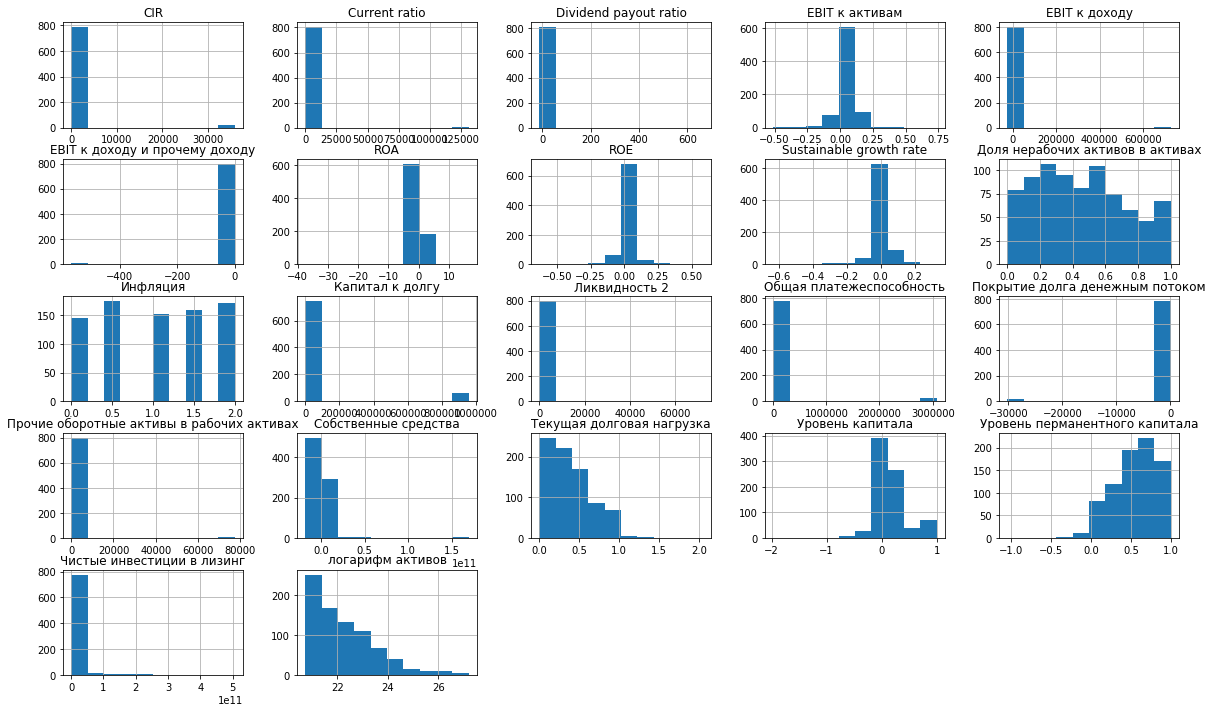

In [2833]:
# Посмотрим на распределение кол-венных данных
Working[list(Working.columns)[4:26]].hist(figsize=(20,12))
pyplot.show()
# Видим, что в каждой переменной есть сильные выбросы, что не позволяет нормально построить график. Поэтому будем смотреть каждую переменную отдельно

(array([  1.,   0.,   0.,   1.,   0.,   1., 798.,   0.,   1.,   2.]),
 array([-9764.18292683, -8315.0185404 , -6865.85415396, -5416.68976753,
        -3967.5253811 , -2518.36099466, -1069.19660823,   379.9677782 ,
         1829.13216463,  3278.29655107,  4727.4609375 ]),
 <a list of 10 Patch objects>)

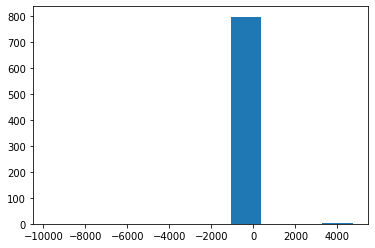

In [2834]:
name = 'Покрытие долга'
pyplot.hist(Working[name])

Text(0.5, 1.0, 'Покрытие долга')

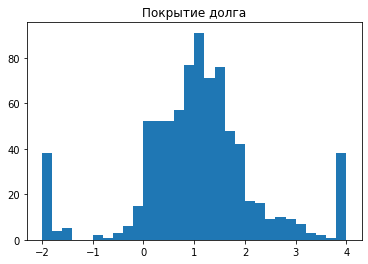

In [2835]:
# Построим покрытие долга от -2 до 4
test = Working.copy()
test.loc[test[name] <= -2, name] = -2
test.loc[test[name] >= 4, name] = 4
pyplot.hist(test[name], bins=30, range=(-2,4))
pyplot.title(name)

In [2836]:
stats, p = shapiro(Working[name])
stats, p
# Не нормальное распределение
# Выбираем способ нормировки 3

(0.06711894273757935, 0.0)

(array([ 18.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1., 785.]),
 array([-47392.86069652, -42192.0956795 , -36991.33066248, -31790.56564546,
        -26589.80062844, -21389.03561142, -16188.2705944 , -10987.50557738,
         -5786.74056036,   -585.97554334,   4614.78947368]),
 <a list of 10 Patch objects>)

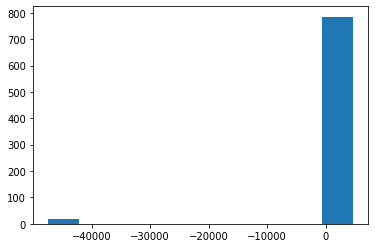

In [2837]:
name = 'Покрытие процентных расходов'
pyplot.hist(Working[name])

Text(0.5, 1.0, 'Покрытие процентных расходов')

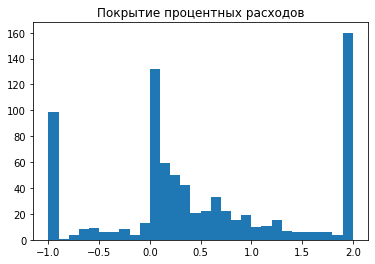

In [2838]:
# Построим Покрытие процентных расходов от -1 до 2
test = Working.copy()
test.loc[test[name] <= -1, name] = -1
test.loc[test[name] >= 2, name] = 2
pyplot.hist(test[name], bins=30, range=(-1,2))
pyplot.title(name)

In [2839]:
stats, p = shapiro(Working[name])
stats, p
# Не нормальное распределение
# Выбираем способ нормировки 3

(0.2085355520248413, 0.0)

(array([  1.,   0.,   1.,   1.,   6.,  29., 392., 266.,  39.,  69.]),
 array([-1.96953798, -1.67258492, -1.37563187, -1.07867881, -0.78172575,
        -0.48477269, -0.18781963,  0.10913343,  0.40608649,  0.70303955,
         0.99999261]),
 <a list of 10 Patch objects>)

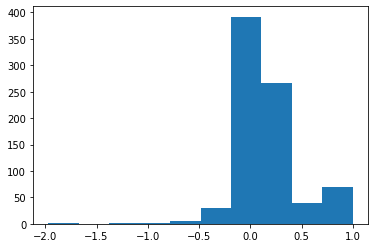

In [2840]:
name = 'Уровень капитала'
pyplot.hist(Working[name])

Text(0.5, 1.0, 'Уровень капитала')

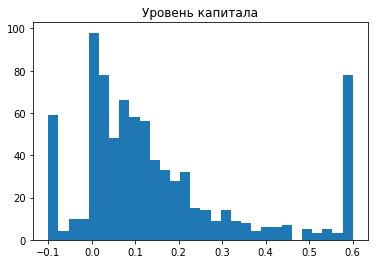

In [2841]:
# Построим Уровень капитала от 0.1 до 0.6
test = Working.copy()
test.loc[test[name] <= -0.1, name] = -0.1
test.loc[test[name] >= 0.6, name] = 0.6
pyplot.hist(test[name], bins=30, range=(-0.1,0.6))
pyplot.title(name)

In [2842]:
stats, p = shapiro(Working[name])
stats, p
# Не нормальное распределение
# Выбираем способ нормировки 3

(0.8128251433372498, 1.5961300895917199e-29)

Text(0.5, 1.0, 'Доля нерабочих активов в активах')

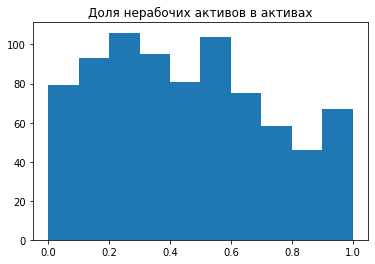

In [2843]:
name = 'Доля нерабочих активов в активах'
pyplot.hist(Working[name])
pyplot.title(name)

In [2844]:
stats, p = shapiro(Working[name])
stats, p
# Не нормальное распределение
# Выбираем способ нормировки 2

(0.9630573987960815, 2.2530152114612345e-13)

(array([783.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  21.]),
 array([    0.        ,  3585.73333333,  7171.46666667, 10757.2       ,
        14342.93333333, 17928.66666667, 21514.4       , 25100.13333333,
        28685.86666667, 32271.6       , 35857.33333333]),
 <a list of 10 Patch objects>)

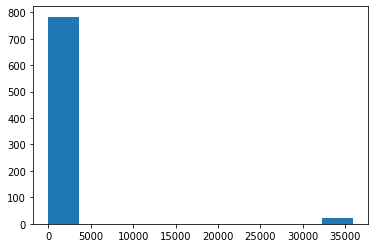

In [2845]:
name = 'CIR'
pyplot.hist(Working[name])

Text(0.5, 1.0, 'CIR')

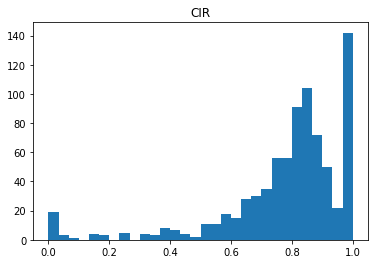

In [2846]:
# Построим CIR от 0 до 1
test = Working.copy()
test.loc[test[name] <= 0, name] = 0
test.loc[test[name] >= 1, name] = 1
pyplot.hist(test[name], bins=30, range=(0,1))
pyplot.title(name)

In [2847]:
stats, p = shapiro(Working[name])
stats, p
# Не нормальное распределение
# Выбираем способ нормировки 3

(0.14633405208587646, 0.0)

(array([745.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,  58.]),
 array([-5.32337783e+00,  9.56908090e+04,  1.91386941e+05,  2.87083074e+05,
         3.82779206e+05,  4.78475338e+05,  5.74171471e+05,  6.69867603e+05,
         7.65563735e+05,  8.61259868e+05,  9.56956000e+05]),
 <a list of 10 Patch objects>)

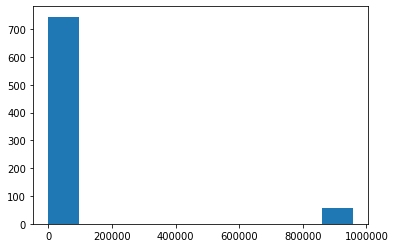

In [2848]:
name = 'Капитал к долгу'
pyplot.hist(Working[name])

Text(0.5, 1.0, 'Капитал к долгу')

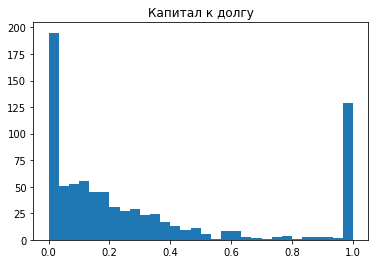

In [2849]:
# Построим Капитал к долгу от 0 до 1
test = Working.copy()
test.loc[test[name] <= 0, name] = 0
test.loc[test[name] >= 1, name] = 1
pyplot.hist(test[name], bins=30, range=(0,1))
pyplot.title(name)

In [2850]:
stats, p = shapiro(Working[name])
stats, p
# Не нормальное распределение
# Выбираем способ нормировки 3

(0.2853231430053711, 0.0)

Text(0.5, 1.0, 'логарифм активов')

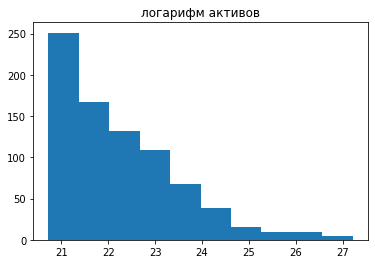

In [2851]:
name = 'логарифм активов'
pyplot.hist(Working[name])
pyplot.title(name)

In [2852]:
stats, p = shapiro(Working[name])
stats, p
# Не нормальное распределение
# Выбираем способ нормировки 3

(0.902292013168335, 3.094831840330189e-22)

(array([798.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   5.]),
 array([    0.  ,  7740.62, 15481.24, 23221.86, 30962.48, 38703.1 ,
        46443.72, 54184.34, 61924.96, 69665.58, 77406.2 ]),
 <a list of 10 Patch objects>)

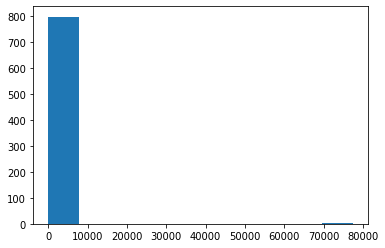

In [2853]:
name = 'Прочие оборотные активы в рабочих активах'
pyplot.hist(Working[name])

Text(0.5, 1.0, 'Прочие оборотные активы в рабочих активах')

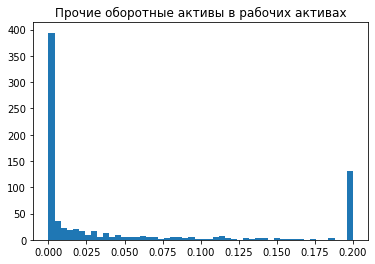

In [2854]:
# Построим Прочие оборотные активы в рабочих активах от 0 до 0.5
test = Working.copy()
test.loc[test[name] <= 0, name] = 0
test.loc[test[name] >= 0.2, name] = 0.2
pyplot.hist(test[name], bins=50, range=(0,0.2))
pyplot.title(name)

In [2855]:
stats, p = shapiro(Working[name])
stats, p
# Не нормальное распределение
# Выбираем способ нормировки 3

(0.0551300048828125, 0.0)

(array([803.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([-13.58648319,  54.24446834, 122.07541986, 189.90637139,
        257.73732291, 325.56827444, 393.39922597, 461.23017749,
        529.06112902, 596.89208054, 664.72303207]),
 <a list of 10 Patch objects>)

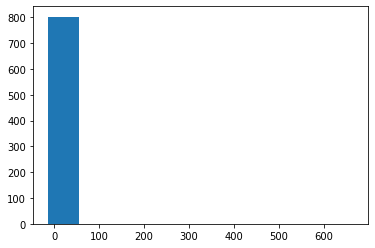

In [2856]:
name = 'Dividend payout ratio'
pyplot.hist(Working[name])

Text(0.5, 1.0, 'Dividend payout ratio')

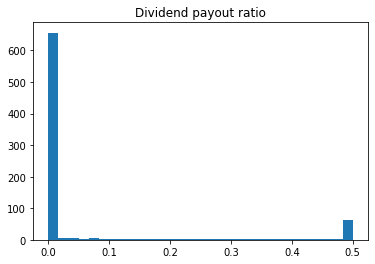

In [2857]:
# Построим Dividend payout ratio от 0 до 0.5
test = Working.copy()
test.loc[test[name] <= 0, name] = 0
test.loc[test[name] >= 0.5, name] = 0.5
pyplot.hist(test[name], bins=30, range=(0,0.5))
pyplot.title(name)

In [2858]:
stats, p = shapiro(Working[name])
stats, p
# Не нормальное распределение
# Выбираем способ нормировки 3

(0.017345011234283447, 0.0)

(array([800.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([6.79647369e-03, 1.31293633e+04, 2.62587197e+04, 3.93880762e+04,
        5.25174326e+04, 6.56467891e+04, 7.87761456e+04, 9.19055020e+04,
        1.05034859e+05, 1.18164215e+05, 1.31293571e+05]),
 <a list of 10 Patch objects>)

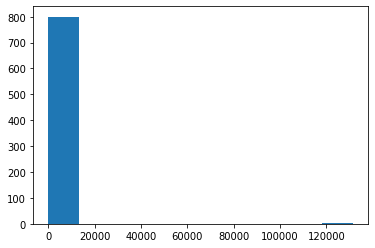

In [2859]:
name = 'Current ratio'
pyplot.hist(Working[name])

Text(0.5, 1.0, 'Current ratio')

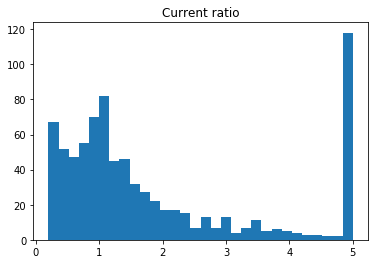

In [2860]:
# Построим Current ratio от 0.2 до 5
test = Working.copy()
test.loc[test[name] <= 0.2, name] = 0.2
test.loc[test[name] >= 5, name] = 5
pyplot.hist(test[name], bins=30, range=(0.2,5))
pyplot.title(name)

In [2861]:
stats, p = shapiro(Working[name])
stats, p
# Не нормальное распределение
# Выбираем способ нормировки 3

(0.0356525182723999, 0.0)

(array([  4.,   2.,   5.,  13.,  65., 677.,  29.,   7.,   1.,   1.]),
 array([-0.63201992, -0.51052666, -0.3890334 , -0.26754015, -0.14604689,
        -0.02455363,  0.09693963,  0.21843289,  0.33992615,  0.4614194 ,
         0.58291266]),
 <a list of 10 Patch objects>)

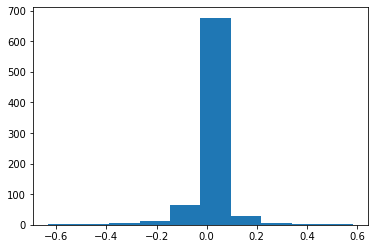

In [2862]:
name = 'ROE'
pyplot.hist(Working[name])

Text(0.5, 1.0, 'ROE')

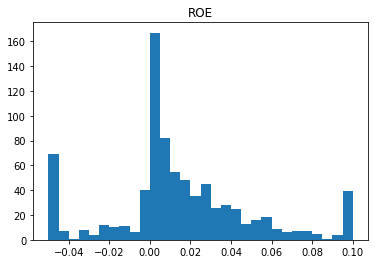

In [2863]:
# Построим ROE от -0.05 до 0.1
test = Working.copy()
test.loc[test[name] <= -0.05, name] = -0.05
test.loc[test[name] >= 0.1, name] = 0.1
pyplot.hist(test[name], bins=30, range=(-0.05,0.1))
pyplot.title(name)

In [2864]:
stats, p = shapiro(Working[name])
stats, p
# Не нормальное распределение
# Выбираем способ нормировки 3

(0.6640579104423523, 5.112965463033624e-37)

(array([  1.,   0.,   2.,   1.,   0.,   5., 607., 187.,   0.,   1.]),
 array([-37.5611588 , -32.14621833, -26.73127787, -21.3163374 ,
        -15.90139694, -10.48645648,  -5.07151601,   0.34342445,
          5.75836492,  11.17330538,  16.58824585]),
 <a list of 10 Patch objects>)

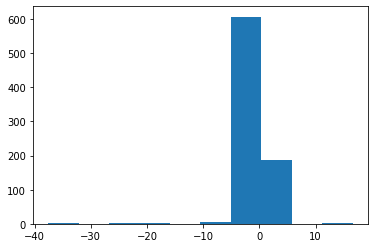

In [2865]:
name = 'ROA'
pyplot.hist(Working[name])

Text(0.5, 1.0, 'ROA')

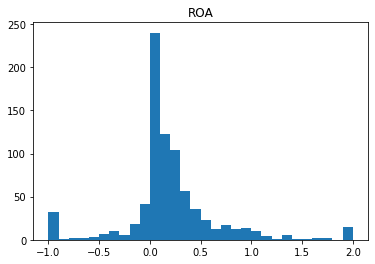

In [2866]:
# Построим ROA от -1 до 2
test = Working.copy()
test.loc[test[name] <= -1, name] = -1
test.loc[test[name] >= 2, name] = 2
pyplot.hist(test[name], bins=30, range=(-1,2))
pyplot.title(name)

In [2867]:
stats, p = shapiro(Working[name])
stats, p
# Не нормальное распределение
# Выбираем способ нормировки 3

(0.24457848072052002, 0.0)

(array([  3.,   2.,   1.,   7.,  12.,  43., 623.,  93.,  14.,   6.]),
 array([-0.63201992, -0.53570617, -0.43939243, -0.34307868, -0.24676493,
        -0.15045118, -0.05413743,  0.04217632,  0.13849006,  0.23480381,
         0.33111756]),
 <a list of 10 Patch objects>)

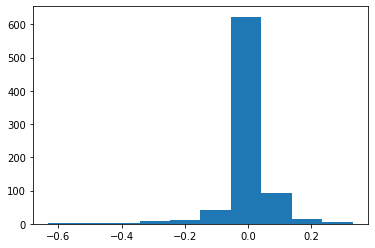

In [2868]:
name = 'Sustainable growth rate'
pyplot.hist(Working[name])

Text(0.5, 1.0, 'Sustainable growth rate')

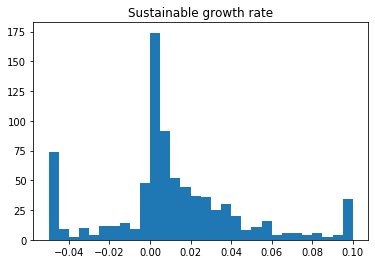

In [2869]:
# Построим Sustainable growth rate от -0.05 до 0.1
test = Working.copy()
test.loc[test[name] <= -0.05, name] = -0.05
test.loc[test[name] >= 0.1, name] = 0.1
pyplot.hist(test[name], bins=30, range=(-0.05,0.1))
pyplot.title(name)

In [2870]:
stats, p = shapiro(Working[name])
stats, p
# Не нормальное распределение
# Выбираем способ нормировки 3

(0.6623019576072693, 4.343893405247409e-37)

(array([  1.,   1.,   0.,   3.,  11.,  81., 120., 195., 222., 170.]),
 array([-1.04896983, -0.84407359, -0.63917734, -0.4342811 , -0.22938486,
        -0.02448861,  0.18040763,  0.38530388,  0.59020012,  0.79509636,
         0.99999261]),
 <a list of 10 Patch objects>)

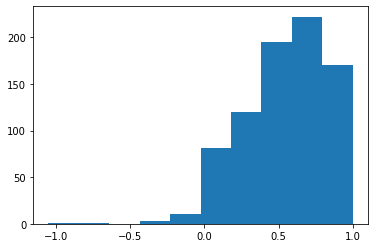

In [2871]:
name = 'Уровень перманентного капитала'
pyplot.hist(Working[name])

Text(0.5, 1.0, 'Уровень перманентного капитала')

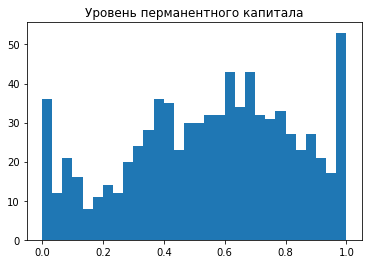

In [2872]:
# Построим Уровень перманентного капитала от 0 до 1
test = Working.copy()
test.loc[test[name] <= 0, name] = 0
test.loc[test[name] >= 1, name] = 1
pyplot.hist(test[name], bins=30, range=(0,1))
pyplot.title(name)

In [2873]:
stats, p = shapiro(Working[name])
stats, p
# Не нормальное распределение
# Выбираем способ нормировки 2

(0.964219868183136, 4.005765174858872e-13)

(array([797.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   6.]),
 array([-26810.65333333,  48789.54533333, 124389.744     , 199989.94266667,
        275590.14133333, 351190.34      , 426790.53866667, 502390.73733333,
        577990.936     , 653591.13466667, 729191.33333333]),
 <a list of 10 Patch objects>)

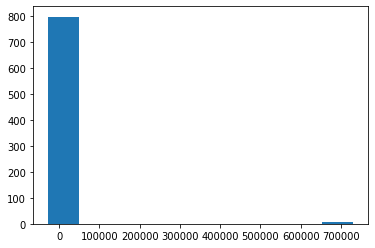

In [2874]:
name = 'EBIT к доходу'
pyplot.hist(Working[name])

Text(0.5, 1.0, 'EBIT к доходу')

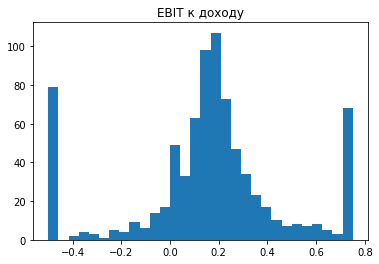

In [2875]:
# Построим EBIT к доходу от -0.5 до 0.75
test = Working.copy()
test.loc[test[name] <= -0.5, name] = -0.5
test.loc[test[name] >= 0.75, name] = 0.75
pyplot.hist(test[name], bins=30, range=(-0.5,0.75))
pyplot.title(name)

In [2876]:
stats, p = shapiro(Working[name])
stats, p
# Не нормальное распределение
# Выбираем способ нормировки 3

(0.07293802499771118, 0.0)

(array([  4.,   3.,   8.,  77., 603.,  97.,   7.,   4.,   0.,   1.]),
 array([-0.51023959, -0.38545246, -0.26066532, -0.13587819, -0.01109106,
         0.11369608,  0.23848321,  0.36327034,  0.48805748,  0.61284461,
         0.73763174]),
 <a list of 10 Patch objects>)

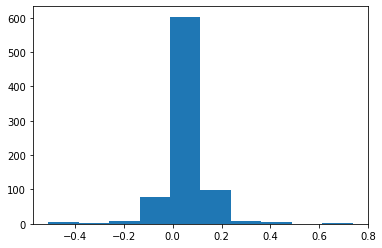

In [2877]:
name = 'EBIT к активам'
pyplot.hist(Working[name])

Text(0.5, 1.0, 'EBIT к активам')

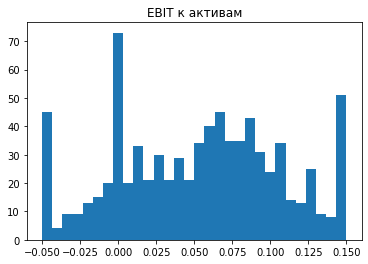

In [2878]:
# Построим EBIT к активам от -0.05 до 0.15
test = Working.copy()
test.loc[test[name] <= -0.05, name] = -0.05
test.loc[test[name] >= 0.15, name] = 0.15
pyplot.hist(test[name], bins=30, range=(-0.05,0.15))
pyplot.title(name)

In [2879]:
stats, p = shapiro(Working[name])
stats, p
# Не нормальное распределение
# Выбираем способ нормировки 2

(0.8362642526626587, 6.201459272705414e-28)

(array([  8.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1., 794.]),
 array([-568.07831325, -511.17070538, -454.26309751, -397.35548963,
        -340.44788176, -283.54027388, -226.63266601, -169.72505814,
        -112.81745026,  -55.90984239,    0.99776548]),
 <a list of 10 Patch objects>)

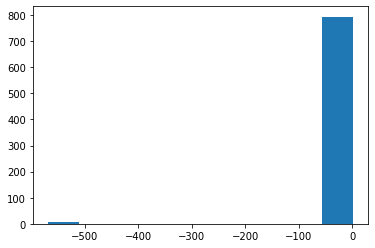

In [2880]:
name = 'EBIT к доходу и прочему доходу'
pyplot.hist(Working[name])

Text(0.5, 1.0, 'EBIT к доходу и прочему доходу')

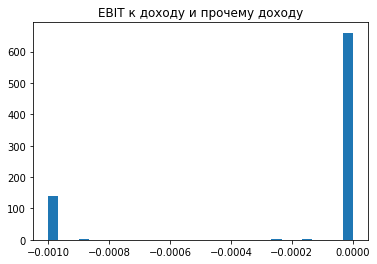

In [2881]:
# Построим EBIT к доходу и прочему доходу от -0.001 до 0
test = Working.copy()
test.loc[test[name] <= -0.001, name] = -0.001
test.loc[test[name] >= 0, name] = 0
pyplot.hist(test[name], bins=30, range=(-0.001,0))
pyplot.title(name)

In [2882]:
stats, p = shapiro(Working[name])
stats, p
# Не нормальное распределение
# Выбираем способ нормировки 3

(0.08508569002151489, 0.0)

(array([797.,   1.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   4.]),
 array([    0.  ,  7222.45, 14444.9 , 21667.35, 28889.8 , 36112.25,
        43334.7 , 50557.15, 57779.6 , 65002.05, 72224.5 ]),
 <a list of 10 Patch objects>)

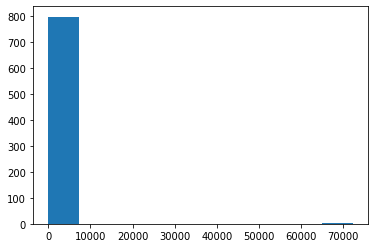

In [2883]:
name = 'Ликвидность 2'
pyplot.hist(Working[name])

Text(0.5, 1.0, 'Ликвидность 2')

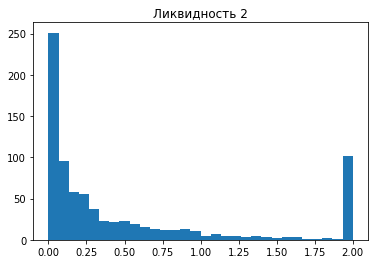

In [2884]:
# Построим Ликвидность 2 от 0 до 2
test = Working.copy()
test.loc[test[name] <= 0, name] = 0
test.loc[test[name] >= 2, name] = 2
pyplot.hist(test[name], bins=30, range=(0,2))
pyplot.title(name)

In [2885]:
stats, p = shapiro(Working[name])
stats, p
# Не нормальное распределение
# Выбираем способ нормировки 3

(0.05989640951156616, 0.0)

(array([ 21.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 783.]),
 array([-30202.33333333, -27171.84098095, -24141.34862857, -21110.85627619,
        -18080.36392381, -15049.87157143, -12019.37921905,  -8988.88686667,
         -5958.39451429,  -2927.9021619 ,    102.59019048]),
 <a list of 10 Patch objects>)

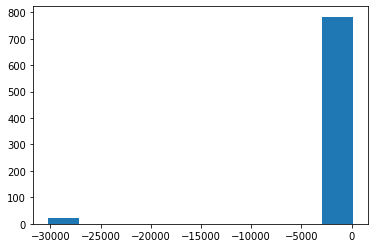

In [2886]:
name = 'Покрытие долга денежным потоком'
pyplot.hist(Working[name])

Text(0.5, 1.0, 'Покрытие долга денежным потоком')

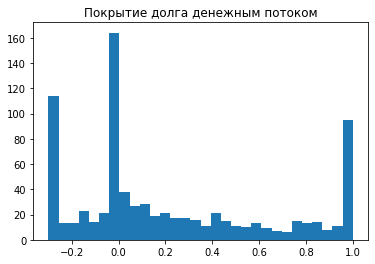

In [2887]:
# Покрытие долга денежным потоком от -0.3 до 1
test = Working.copy()
test.loc[test[name] <= -0.3, name] = -0.3
test.loc[test[name] >= 1, name] = 1
pyplot.hist(test[name], bins=30, range=(-0.3,1))
pyplot.title(name)

In [2888]:
stats, p = shapiro(Working[name])
stats, p
# Не нормальное распределение
# Выбираем способ нормировки 3

(0.14623451232910156, 0.0)

(array([776.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  27.]),
 array([4.19082035e-03, 3.07863404e+05, 6.15726803e+05, 9.23590203e+05,
        1.23145360e+06, 1.53931700e+06, 1.84718040e+06, 2.15504380e+06,
        2.46290720e+06, 2.77077060e+06, 3.07863400e+06]),
 <a list of 10 Patch objects>)

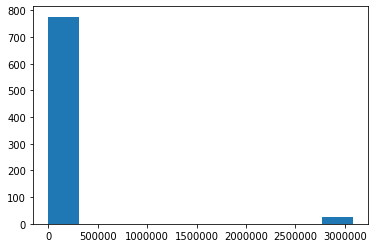

In [2889]:
name = 'Общая платежеспособность'
pyplot.hist(Working[name])

Text(0.5, 1.0, 'Общая платежеспособность')

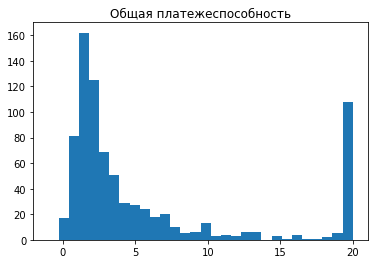

In [2890]:
# Построим Общая платежеспособность от -1 до 20
test = Working.copy()
test.loc[test[name] <= -1, name] = -1
test.loc[test[name] >= 20, name] = 20
pyplot.hist(test[name], bins=30, range=(-1,20))
pyplot.title(name)

In [2891]:
stats, p = shapiro(Working[name])
stats, p
# Не нормальное распределение
# Выбираем способ нормировки 3

(0.17597723007202148, 0.0)

(array([777.,  11.,   8.,   4.,   3.,   0.,   0.,   0.,   0.,   1.]),
 array([0.00000000e+00, 5.06603209e+10, 1.01320642e+11, 1.51980963e+11,
        2.02641284e+11, 2.53301604e+11, 3.03961925e+11, 3.54622246e+11,
        4.05282567e+11, 4.55942888e+11, 5.06603209e+11]),
 <a list of 10 Patch objects>)

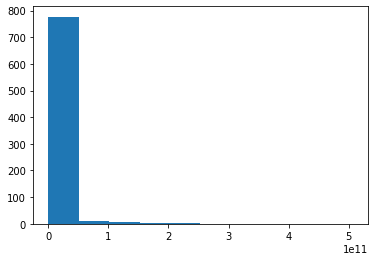

In [2892]:
name = 'Чистые инвестиции в лизинг'
pyplot.hist(Working[name])

Text(0.5, 1.0, 'Чистые инвестиции в лизинг')

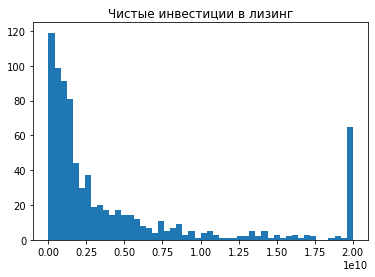

In [2893]:
# Построим Чистые инвестиции в лизинг от 10000000 до 20000000000
test = Working.copy()
test.loc[test[name] <= 10000000, name] = 10000000
test.loc[test[name] >= 20000000000, name] = 20000000000
pyplot.hist(test[name], bins=50, range=(10000000,20000000000))
pyplot.title(name)

In [2894]:
stats, p = shapiro(Working[name])
stats, p
# Не нормальное распределение
# Выбираем способ нормировки 3

(0.2717170715332031, 0.0)

(array([496., 291.,   6.,   6.,   1.,   0.,   1.,   0.,   0.,   3.]),
 array([-1.81455760e+10,  6.49347700e+08,  1.94442714e+10,  3.82391951e+10,
         5.70341188e+10,  7.58290425e+10,  9.46239662e+10,  1.13418890e+11,
         1.32213814e+11,  1.51008737e+11,  1.69803661e+11]),
 <a list of 10 Patch objects>)

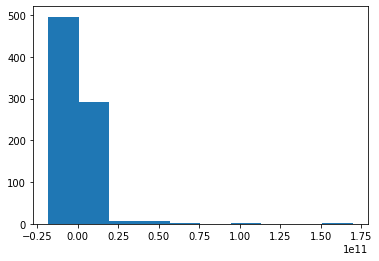

In [2895]:
name = 'Собственные средства'
pyplot.hist(Working[name])

Text(0.5, 1.0, 'Собственные средства')

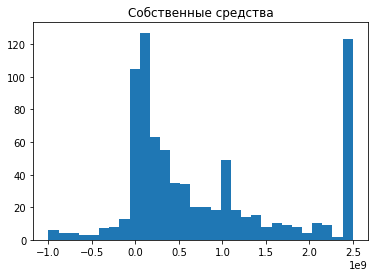

In [2896]:
# Построим Собственные средства от -1000000000 до 2500000000
test = Working.copy()
test.loc[test[name] <= -1000000000, name] = 1000000000
test.loc[test[name] >= 2500000000, name] = 2500000000
pyplot.hist(test[name], bins=30, range=(-1000000000,2500000000))
pyplot.title(name)

In [2897]:
stats, p = shapiro(Working[name])
stats, p
# Не нормальное распределение
# Выбираем способ нормировки 3

(0.1979818344116211, 0.0)

(array([246., 222., 170.,  87.,  68.,   6.,   3.,   0.,   1.,   1.]),
 array([0.        , 0.20449358, 0.40898716, 0.61348073, 0.81797431,
        1.02246789, 1.22696147, 1.43145504, 1.63594862, 1.8404422 ,
        2.04493578]),
 <a list of 10 Patch objects>)

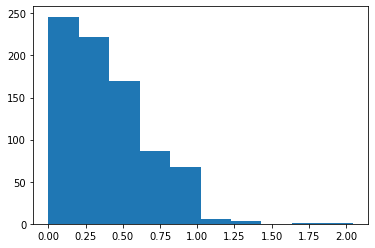

In [2898]:
name = 'Текущая долговая нагрузка'
pyplot.hist(Working[name])

Text(0.5, 1.0, 'Текущая долговая нагрузка')

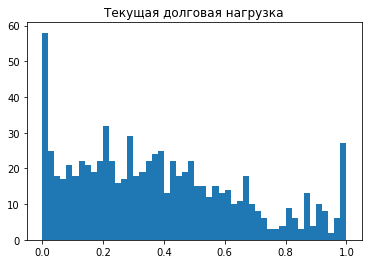

In [2899]:
# Построим Текущая долговая нагрузка от -0 до 1
test = Working.copy()
test.loc[test[name] <= 0, name] = 0
test.loc[test[name] >= 1, name] = 1
pyplot.hist(test[name], bins=50, range=(0,1))
pyplot.title(name)

In [2900]:
stats, p = shapiro(Working[name])
stats, p
# Не нормальное распределение
# Выбираем способ нормировки 2

(0.9383130669593811, 9.672246063639704e-18)

(array([790.,   4.,   1.,   4.,   1.,   0.,   1.,   0.,   0.,   3.]),
 array([3.60000000e+04, 1.69803985e+10, 3.39607610e+10, 5.09411235e+10,
        6.79214860e+10, 8.49018485e+10, 1.01882211e+11, 1.18862574e+11,
        1.35842936e+11, 1.52823298e+11, 1.69803661e+11]),
 <a list of 10 Patch objects>)

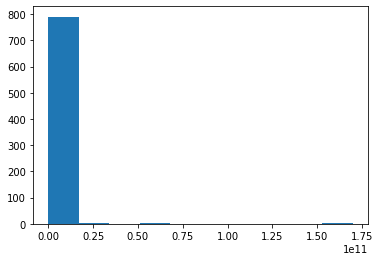

In [2901]:
# Также оценим балл нескольких переменных качества управления
name = 'Разводненность капитала'
pyplot.hist(Working[name])

Text(0.5, 1.0, 'Разводненность капитала')

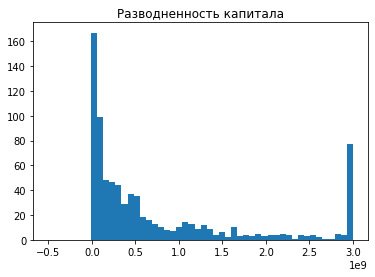

In [2902]:
# Построим Разводненность капитала от -500000000 до 3000000000
test = Working.copy()
test.loc[test[name] <= -500000000, name] = -500000000
test.loc[test[name] >= 3000000000, name] = 3000000000
pyplot.hist(test[name], bins=50, range=(-500000000,3000000000))
pyplot.title(name)

In [2903]:
stats, p = shapiro(Working[name])
stats, p
# Не нормальное распределение
# Выбираем способ нормировки 3

(0.14527469873428345, 0.0)

Text(0.5, 1.0, 'Доля ин. акционеров')

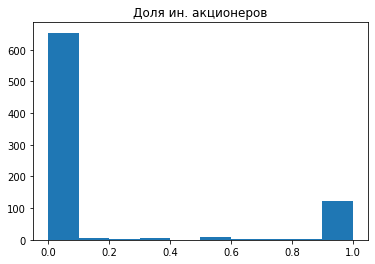

In [2904]:
name = 'Доля ин. акционеров'
pyplot.hist(Working[name])
pyplot.title(name)

In [2905]:
stats, p = shapiro(Working[name])
stats, p
# Не нормальное распределение
# Баллы: 0 - 0, (0-1) - 1, 1 - 2

(0.4744376540184021, 2.368194404708941e-43)

In [2906]:
Working.loc[Working['Доля ин. акционеров'] == 0, 'Доля ин. акционеров'] = 0
Working.loc[Working['Доля ин. акционеров'] == 1, 'Доля ин. акционеров'] = 2
Working.loc[(Working['Доля ин. акционеров'] > 0) & (Working['Доля ин. акционеров'] < 1), 'Доля ин. акционеров'] = 2

Working_test.loc[Working_test['Доля ин. акционеров'] == 0, 'Доля ин. акционеров'] = 0
Working_test.loc[Working_test['Доля ин. акционеров'] == 1, 'Доля ин. акционеров'] = 2
Working_test.loc[(Working_test['Доля ин. акционеров'] > 0) & (Working_test['Доля ин. акционеров'] < 1), 'Доля ин. акционеров'] = 2

(array([ 18.,   7.,  18.,  20.,  54.,  18.,  19.,  46.,  27., 577.]),
 array([0.123 , 0.2107, 0.2984, 0.3861, 0.4738, 0.5615, 0.6492, 0.7369,
        0.8246, 0.9123, 1.    ]),
 <a list of 10 Patch objects>)

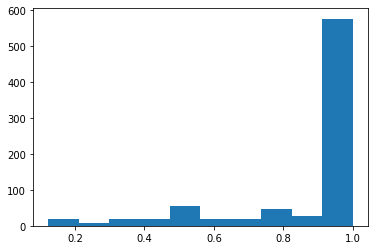

In [2907]:
name = 'Доля крупнейшего собственника'
pyplot.hist(Working[name])

Text(0.5, 1.0, 'Доля крупнейшего собственника')

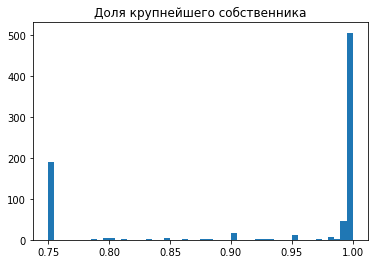

In [2908]:
# Построим Доля крупнейшего собственника от 0.75 до 1
test = Working.copy()
test.loc[test[name] <= 0.75, name] = 0.75
test.loc[test[name] >= 1, name] = 1
pyplot.hist(test[name], bins=50, range=(0.75,1))
pyplot.title(name)

In [2909]:
stats, p = shapiro(Working[name])
stats, p
# Не нормальное распределение
# До 0.75 вкл - 0, (0.75-1) - 1, 1 - 2

(0.6187582015991211, 9.352655511876911e-39)

In [2910]:
Working.loc[Working['Доля крупнейшего собственника'] <= 0.75, 'Доля крупнейшего собственника'] = 0
Working.loc[Working['Доля крупнейшего собственника'] == 1, 'Доля крупнейшего собственника'] = 2
Working.loc[(Working['Доля крупнейшего собственника'] > 0.75) & (Working['Доля крупнейшего собственника'] < 1), 'Доля крупнейшего собственника'] = 2

Working_test.loc[Working_test['Доля крупнейшего собственника'] <= 0.75, 'Доля крупнейшего собственника'] = 0
Working_test.loc[Working_test['Доля крупнейшего собственника'] == 1, 'Доля крупнейшего собственника'] = 2
Working_test.loc[(Working_test['Доля крупнейшего собственника'] > 0.75) & (Working_test['Доля крупнейшего собственника'] < 1), 'Доля крупнейшего собственника'] = 2

(array([776.,   8.,   6.,   1.,   3.,   5.,   3.,   0.,   0.,   2.]),
 array([0.00023769, 0.01646986, 0.03270202, 0.04893418, 0.06516634,
        0.0813985 , 0.09763066, 0.11386283, 0.13009499, 0.14632715,
        0.16255931]),
 <a list of 10 Patch objects>)

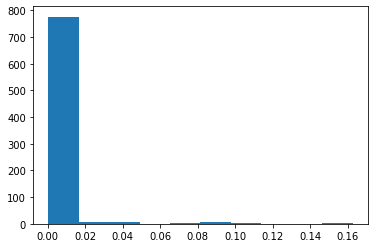

In [2911]:
name = 'Доля от выборки'
pyplot.hist(Working[name])

Text(0.5, 1.0, 'Доля от выборки')

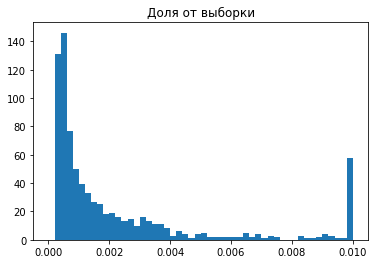

In [2912]:
# Построим Доля от выборки от 0 до 0.01
test = Working.copy()
test.loc[test[name] <= 0, name] = 0
test.loc[test[name] >= 0.01, name] = 0.01
pyplot.hist(test[name], bins=50, range=(0,0.01))
pyplot.title(name)

In [2913]:
stats, p = shapiro(Working[name])
stats, p
# Не нормальное распределение
# Выбираем способ нормировки 3

(0.2663489580154419, 0.0)

In [2914]:
# Разбаловка 2 способом (по группам)
def score_2 (variable, borders):
    per2_5 = np.percentile(Working[variable], 2.5)
    per97_5 = np.percentile(Working[variable], 97.5)
    Working.loc[Working[variable] >= per97_5, variable] = per97_5
    Working.loc[Working[variable] <= per2_5, variable] = per2_5
    score0_5 = np.percentile(Working.loc[(Working[variable] != per97_5) & (Working[variable] != per2_5), variable], 33)
    score1_5 = np.percentile(Working.loc[(Working[variable] != per97_5) & (Working[variable] != per2_5), variable], 67)
    Working.loc[(Working[variable] > per2_5) & (Working[variable] <= score0_5), variable] = score0_5
    Working.loc[(Working[variable] < per97_5) & (Working[variable] >= score1_5), variable] = score1_5
    Working.loc[(Working[variable] > score0_5) & (Working[variable] < score1_5), variable] = 'm'
    Working.loc[Working[variable] == per2_5, variable] = 'l'
    Working.loc[Working[variable] == per97_5, variable] = 'h'
    Working.loc[Working[variable] == score0_5, variable] = 'm1'
    Working.loc[Working[variable] == score1_5, variable] = 'm2'
    Working.loc[Working[variable] == 'l', variable] = 0
    Working.loc[Working[variable] == 'h', variable] = 2
    Working.loc[Working[variable] == 'm1', variable] = 0.5
    Working.loc[Working[variable] == 'm2', variable] = 1.5
    Working.loc[Working[variable] == 'm', variable] = 1
    borders = borders.append({'Показатель' : [variable],
              '0 - 0.5:' : [per2_5],
              '0.5 - 1:' : [score0_5],
              '1 - 1.5:' : [score1_5],
              '1.5 - 2:' : [per97_5]}, ignore_index=True)
    return(borders)

In [2915]:
borders = pd.DataFrame({'Показатель' : [np.nan],
                      '0 - 0.5:' : [np.nan],
                      '0.5 - 1:' : [np.nan],
                      '1 - 1.5:' : [np.nan],
                      '1.5 - 2:' : [np.nan]})

In [2916]:
# Найдем границы показателей для разбаловки
borders = score_2('Покрытие долга', borders)
borders = score_2('Покрытие процентных расходов', borders)
borders = score_2('Уровень капитала', borders)
borders = score_2('CIR', borders)
borders = score_2('Капитал к долгу', borders)
borders = score_2('логарифм активов', borders)
borders = score_2('Прочие оборотные активы в рабочих активах', borders)
borders = score_2('Current ratio', borders)
borders = score_2('Dividend payout ratio', borders)
borders = score_2('ROE', borders)
borders = score_2('ROA', borders)
borders = score_2('Sustainable growth rate', borders)
borders = score_2('EBIT к доходу', borders)
borders = score_2('EBIT к доходу и прочему доходу', borders)
borders = score_2('Ликвидность 2', borders)
borders = score_2('Покрытие долга денежным потоком', borders)
borders = score_2('Общая платежеспособность', borders)
borders = score_2('Чистые инвестиции в лизинг', borders)
borders = score_2('Собственные средства', borders)
borders = score_2('Разводненность капитала', borders)
borders = score_2('Доля от выборки', borders)

borders

,Показатель,0 - 0.5:,0.5 - 1:,1 - 1.5:,1.5 - 2:
0,NaN,NaN,NaN,NaN,NaN
1,[Покрытие долга],[-14.221728558071028],[0.7529458909866357],[1.4278273725014226],[6.022180799400001]
2,[Покрытие процентных расходов],[-113.49824805365498],[0.0686625174609273],[0.6294079888227038],[4614.78947368421]
3,[Уровень капитала],[-0.31357761517346483],[0.0459941142568497],[0.1594954114982488],[0.9960430076009619]
4,[CIR],[0.048851134881092016],[0.7678503396323114],[0.8720451250089598],[32076.574333331846]
5,[Капитал к долгу],[-0.4066740285277531],[0.07774686178525618],[0.27022560101425463],[956956.0]
6,[логарифм активов],[20.758406056455787],[21.44508202886596],[22.54500423335337],[25.438774574028404]
7,[Прочие оборотные активы в рабочих активах],[0.0],[0.00318781441358268],[0.0633758308748945],[5.986987452214515]
8,[Current ratio],[0.1445470525019805],[0.9483746763408074],[1.884619309327286],[324.74954818048474]
9,[Dividend payout ratio],[0.0],[0.21566694096265088],[0.48214441177540196],[1.4094640197928006]


In [2917]:
# Перевод переменных в баллы
for i in range (1, 22):
    Working_test.loc[Working_test[list(borders['Показатель'])[i][0]] <= list(borders['0 - 0.5:'])[i][0],list(borders['Показатель'])[i][0]] = list(borders['0 - 0.5:'])[i][0]
    Working_test.loc[(Working_test[list(borders['Показатель'])[i][0]] > list(borders['0 - 0.5:'])[i][0]) & (Working_test[list(borders['Показатель'])[i][0]] <= list(borders['0.5 - 1:'])[i][0]),list(borders['Показатель'])[i][0]] = list(borders['0.5 - 1:'])[i][0]
    Working_test.loc[(Working_test[list(borders['Показатель'])[i][0]] > list(borders['0.5 - 1:'])[i][0]) & (Working_test[list(borders['Показатель'])[i][0]] <= list(borders['1 - 1.5:'])[i][0]),list(borders['Показатель'])[i][0]] = list(borders['1 - 1.5:'])[i][0]
    Working_test.loc[(Working_test[list(borders['Показатель'])[i][0]] > list(borders['1 - 1.5:'])[i][0]) & (Working_test[list(borders['Показатель'])[i][0]] <= list(borders['1.5 - 2:'])[i][0]),list(borders['Показатель'])[i][0]] = list(borders['1.5 - 2:'])[i][0]
    Working_test.loc[Working_test[list(borders['Показатель'])[i][0]] >= list(borders['1.5 - 2:'])[i][0],list(borders['Показатель'])[i][0]] = 'h'
    Working_test.loc[Working_test[list(borders['Показатель'])[i][0]] == list(borders['0 - 0.5:'])[i][0],list(borders['Показатель'])[i][0]] = 'l'
    Working_test.loc[Working_test[list(borders['Показатель'])[i][0]] == list(borders['0.5 - 1:'])[i][0],list(borders['Показатель'])[i][0]] = 'm'
    Working_test.loc[Working_test[list(borders['Показатель'])[i][0]] == list(borders['1 - 1.5:'])[i][0],list(borders['Показатель'])[i][0]] = 'm1'
    Working_test.loc[Working_test[list(borders['Показатель'])[i][0]] == list(borders['1.5 - 2:'])[i][0],list(borders['Показатель'])[i][0]] = 'm2'
    Working_test.loc[Working_test[list(borders['Показатель'])[i][0]] == 'h',list(borders['Показатель'])[i][0]] = 2
    Working_test.loc[Working_test[list(borders['Показатель'])[i][0]] == 'l',list(borders['Показатель'])[i][0]] = 0
    Working_test.loc[Working_test[list(borders['Показатель'])[i][0]] == 'm',list(borders['Показатель'])[i][0]] = 0.5
    Working_test.loc[Working_test[list(borders['Показатель'])[i][0]] == 'm1',list(borders['Показатель'])[i][0]] = 1
    Working_test.loc[Working_test[list(borders['Показатель'])[i][0]] == 'm2',list(borders['Показатель'])[i][0]] = 1.5

In [2918]:
# Разбаловка 3 способом (по группам)
def score_3 (variable, borders):
    per2_5 = np.percentile(Working[variable], 2.5)
    per97_5 = np.percentile(Working[variable], 97.5)
    Working.loc[Working[variable] >= per97_5, variable] = per97_5
    Working.loc[Working[variable] <= per2_5, variable] = per2_5
    main = Working.loc[(Working[variable] != per2_5) & (Working[variable] != per97_5), variable]
    Working.loc[(Working[variable] != per2_5) & (Working[variable] != per97_5), variable] = (main - per2_5)*2/(per97_5 - per2_5)
    Working.loc[Working[variable] == per2_5, variable] = 0
    Working.loc[Working[variable] == per97_5, variable] = 2
    borders = borders.append({'Показатель' : [variable],
              '0 - 0.5:' : [per2_5],
              '0.5 - 1:' : ['-'],
              '1 - 1.5:' : ["-"],
              '1.5 - 2:' : [per97_5]}, ignore_index=True)
    return(borders)

In [2919]:
# Найдем границы показателей для разбаловки
borders = score_3('Доля нерабочих активов в активах', borders)
borders = score_3('Уровень перманентного капитала', borders)
borders = score_3('EBIT к активам', borders)
borders = score_3('Текущая долговая нагрузка', borders)

borders

,Показатель,0 - 0.5:,0.5 - 1:,1 - 1.5:,1.5 - 2:
0,NaN,NaN,NaN,NaN,NaN
1,[Покрытие долга],[-14.221728558071028],[0.7529458909866357],[1.4278273725014226],[6.022180799400001]
2,[Покрытие процентных расходов],[-113.49824805365498],[0.0686625174609273],[0.6294079888227038],[4614.78947368421]
3,[Уровень капитала],[-0.31357761517346483],[0.0459941142568497],[0.1594954114982488],[0.9960430076009619]
4,[CIR],[0.048851134881092016],[0.7678503396323114],[0.8720451250089598],[32076.574333331846]
5,[Капитал к долгу],[-0.4066740285277531],[0.07774686178525618],[0.27022560101425463],[956956.0]
6,[логарифм активов],[20.758406056455787],[21.44508202886596],[22.54500423335337],[25.438774574028404]
7,[Прочие оборотные активы в рабочих активах],[0.0],[0.00318781441358268],[0.0633758308748945],[5.986987452214515]
8,[Current ratio],[0.1445470525019805],[0.9483746763408074],[1.884619309327286],[324.74954818048474]
9,[Dividend payout ratio],[0.0],[0.21566694096265088],[0.48214441177540196],[1.4094640197928006]


In [2920]:
# Перевод переменных в баллы
for i in range (22, 26):
    Working_test.loc[Working_test[list(borders['Показатель'])[i][0]] <= list(borders['0 - 0.5:'])[i][0],list(borders['Показатель'])[i][0]] = list(borders['0 - 0.5:'])[i][0]
    Working_test.loc[Working_test[list(borders['Показатель'])[i][0]] >= list(borders['1.5 - 2:'])[i][0],list(borders['Показатель'])[i][0]] = list(borders['1.5 - 2:'])[i][0]
    main = Working_test.loc[(Working_test[list(borders['Показатель'])[i][0]] > list(borders['0 - 0.5:'])[i][0]) & (Working_test[list(borders['Показатель'])[i][0]] < list(borders['1.5 - 2:'])[i][0]),list(borders['Показатель'])[i][0]]
    Working_test.loc[(Working_test[list(borders['Показатель'])[i][0]] > list(borders['0 - 0.5:'])[i][0]) & (Working_test[list(borders['Показатель'])[i][0]] < list(borders['1.5 - 2:'])[i][0]),list(borders['Показатель'])[i][0]] = (main - list(borders['0 - 0.5:'])[i][0])*2 / (list(borders['1.5 - 2:'])[i][0] - list(borders['0 - 0.5:'])[i][0])
    Working_test.loc[Working_test[list(borders['Показатель'])[i][0]] == list(borders['0 - 0.5:'])[i][0],list(borders['Показатель'])[i][0]] = 0
    Working_test.loc[Working_test[list(borders['Показатель'])[i][0]] == list(borders['1.5 - 2:'])[i][0],list(borders['Показатель'])[i][0]] = 2

In [2921]:
Working = Working.drop(columns = ['год (финансы)'], axis = 1)
Working_test = Working_test.drop(columns = ['год (финансы)'], axis = 1)

In [2922]:
# Запишем те переменные, где кор-ция с дефолтами положительная и потом переведем их в обратный балл
positive_cor = []
for i in list(Working.columns):
    if np.corrcoef(Working['дефолт'],Working[i].astype(float))[1, 0] >= 0:
        positive_cor.append(i)

In [2923]:
positive_cor[:-1]

['Москва',
 'Доля нерабочих активов в активах',
 'CIR',
 'Прочие оборотные активы в рабочих активах',
 'Общая платежеспособность',
 'Текущая долговая нагрузка',
 'Инфляция',
 'Доля крупнейшего собственника',
 'Разветвленность собственности']

In [2924]:
Working[positive_cor[:-1]] = 2 - Working[positive_cor[:-1]]

In [2925]:
Working_test[positive_cor[:-1]] = 2 - Working_test[positive_cor[:-1]]

In [2926]:
# Выкидываем переменные, корреляция которых не согласуется с экономической логикой
Working = Working.drop(columns = ['Москва'], axis = 1)
Working_test = Working_test.drop(columns = ['Москва'], axis = 1)

Working = Working.drop(columns = ['Разветвленность собственности'], axis = 1)
Working_test = Working_test.drop(columns = ['Разветвленность собственности'], axis = 1)

In [2927]:
# Начинаем исследование

In [2928]:
# Выпишем переменные с AR менее 0,1 в bad_predict, а остальные в AR_otbor
bad_predict = []
AR_otbor = pd.DataFrame({'Показатель' : [np.nan],
                      'AR' : [np.nan]})
for var in list(Working.columns):
    AR_otbor = AR_otbor.append({'Показатель' : var,
                               'AR' : AR(Working['дефолт'], Working[var])}, ignore_index=True)
    if AR(Working['дефолт'], Working[var]) <= 0.1:
        bad_predict.append(var)

In [2929]:
bad_predict

['Покрытие долга',
 'CIR',
 'Прочие оборотные активы в рабочих активах',
 'Доля ин. акционеров',
 'Доля крупнейшего собственника']

In [2930]:
AR_otbor

,Показатель,AR
0,NaN,NaN
1,Покрытие долга,0.099193
2,Покрытие процентных расходов,0.573471
3,Уровень капитала,0.427793
4,Доля нерабочих активов в активах,0.112710
5,CIR,0.046095
6,Капитал к долгу,0.453467
7,логарифм активов,0.347175
8,Прочие оборотные активы в рабочих активах,0.054653
9,Dividend payout ratio,0.190898


In [2931]:
# Выкидываем показатели с AR менее 0,1
for var in bad_predict:
    Working = Working.drop(columns = [var], axis = 1)
    Working_test = Working_test.drop(columns = [var], axis = 1)
    

In [2932]:
list(Working.columns)

['Покрытие процентных расходов',
 'Уровень капитала',
 'Доля нерабочих активов в активах',
 'Капитал к долгу',
 'логарифм активов',
 'Dividend payout ratio',
 'Current ratio',
 'ROE',
 'ROA',
 'Sustainable growth rate',
 'Уровень перманентного капитала',
 'EBIT к доходу',
 'EBIT к активам',
 'EBIT к доходу и прочему доходу',
 'Ликвидность 2',
 'Покрытие долга денежным потоком',
 'Общая платежеспособность',
 'Чистые инвестиции в лизинг',
 'Собственные средства',
 'Текущая долговая нагрузка',
 'Инфляция',
 'Торговый баланс',
 'Кризис',
 'Кредитный рейтинг',
 'Экон. свобода',
 'курс доллара',
 'Доля от выборки',
 'Разводненность капитала',
 'n компаний до кон. владельца',
 'Надежность собственников и поддержка',
 'дефолт',
 'Аудитор',
 'Прирост чистых инвестиций_балл',
 'Принадлежность группе']

In [2933]:
# Найдем VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

VIF = Working.drop(columns = ['дефолт'], axis = 1)
vif = pd.DataFrame()
vif["variables"] = VIF.columns
vif["VIF"] = [variance_inflation_factor(VIF.astype(float).values, i) for i in range(len(VIF.columns))]


In [2934]:
vif
# Бесконечность у макропеременных

,variables,VIF
0,Покрытие процентных расходов,2.404622
1,Уровень капитала,6.950662
2,Доля нерабочих активов в активах,1.195114
3,Капитал к долгу,5.692334
4,логарифм активов,9.731229
5,Dividend payout ratio,1.736722
6,Current ratio,2.219817
7,ROE,8.748367
8,ROA,1.453436
9,Sustainable growth rate,8.065114


In [2935]:
VIF = Working.drop(columns = ['дефолт', 'Торговый баланс'], axis = 1)
vif = pd.DataFrame()
vif["variables"] = VIF.columns
vif["VIF"] = [variance_inflation_factor(VIF.astype(float).values, i) for i in range(len(VIF.columns))]

In [2936]:
vif
# Убрали 1 макропеременную, теперь у них просто большие VIF

,variables,VIF
0,Покрытие процентных расходов,2.404622
1,Уровень капитала,6.950662
2,Доля нерабочих активов в активах,1.195114
3,Капитал к долгу,5.692334
4,логарифм активов,9.731229
5,Dividend payout ratio,1.736722
6,Current ratio,2.219817
7,ROE,8.748367
8,ROA,1.453436
9,Sustainable growth rate,8.065114


In [2937]:
# Убрали с сильными корреляциями (см ячейку ниже, можно их поменять местами)
VIF = Working.drop(columns = ['дефолт', 'Доля от выборки', 'Уровень капитала', 'Sustainable growth rate', 'Уровень перманентного капитала', 'EBIT к доходу', 'Торговый баланс', 'Экон. свобода', 'Принадлежность группе'], axis = 1)
vif = pd.DataFrame()
vif["variables"] = VIF.columns
vif["VIF"] = [variance_inflation_factor(VIF.astype(float).values, i) for i in range(len(VIF.columns))]

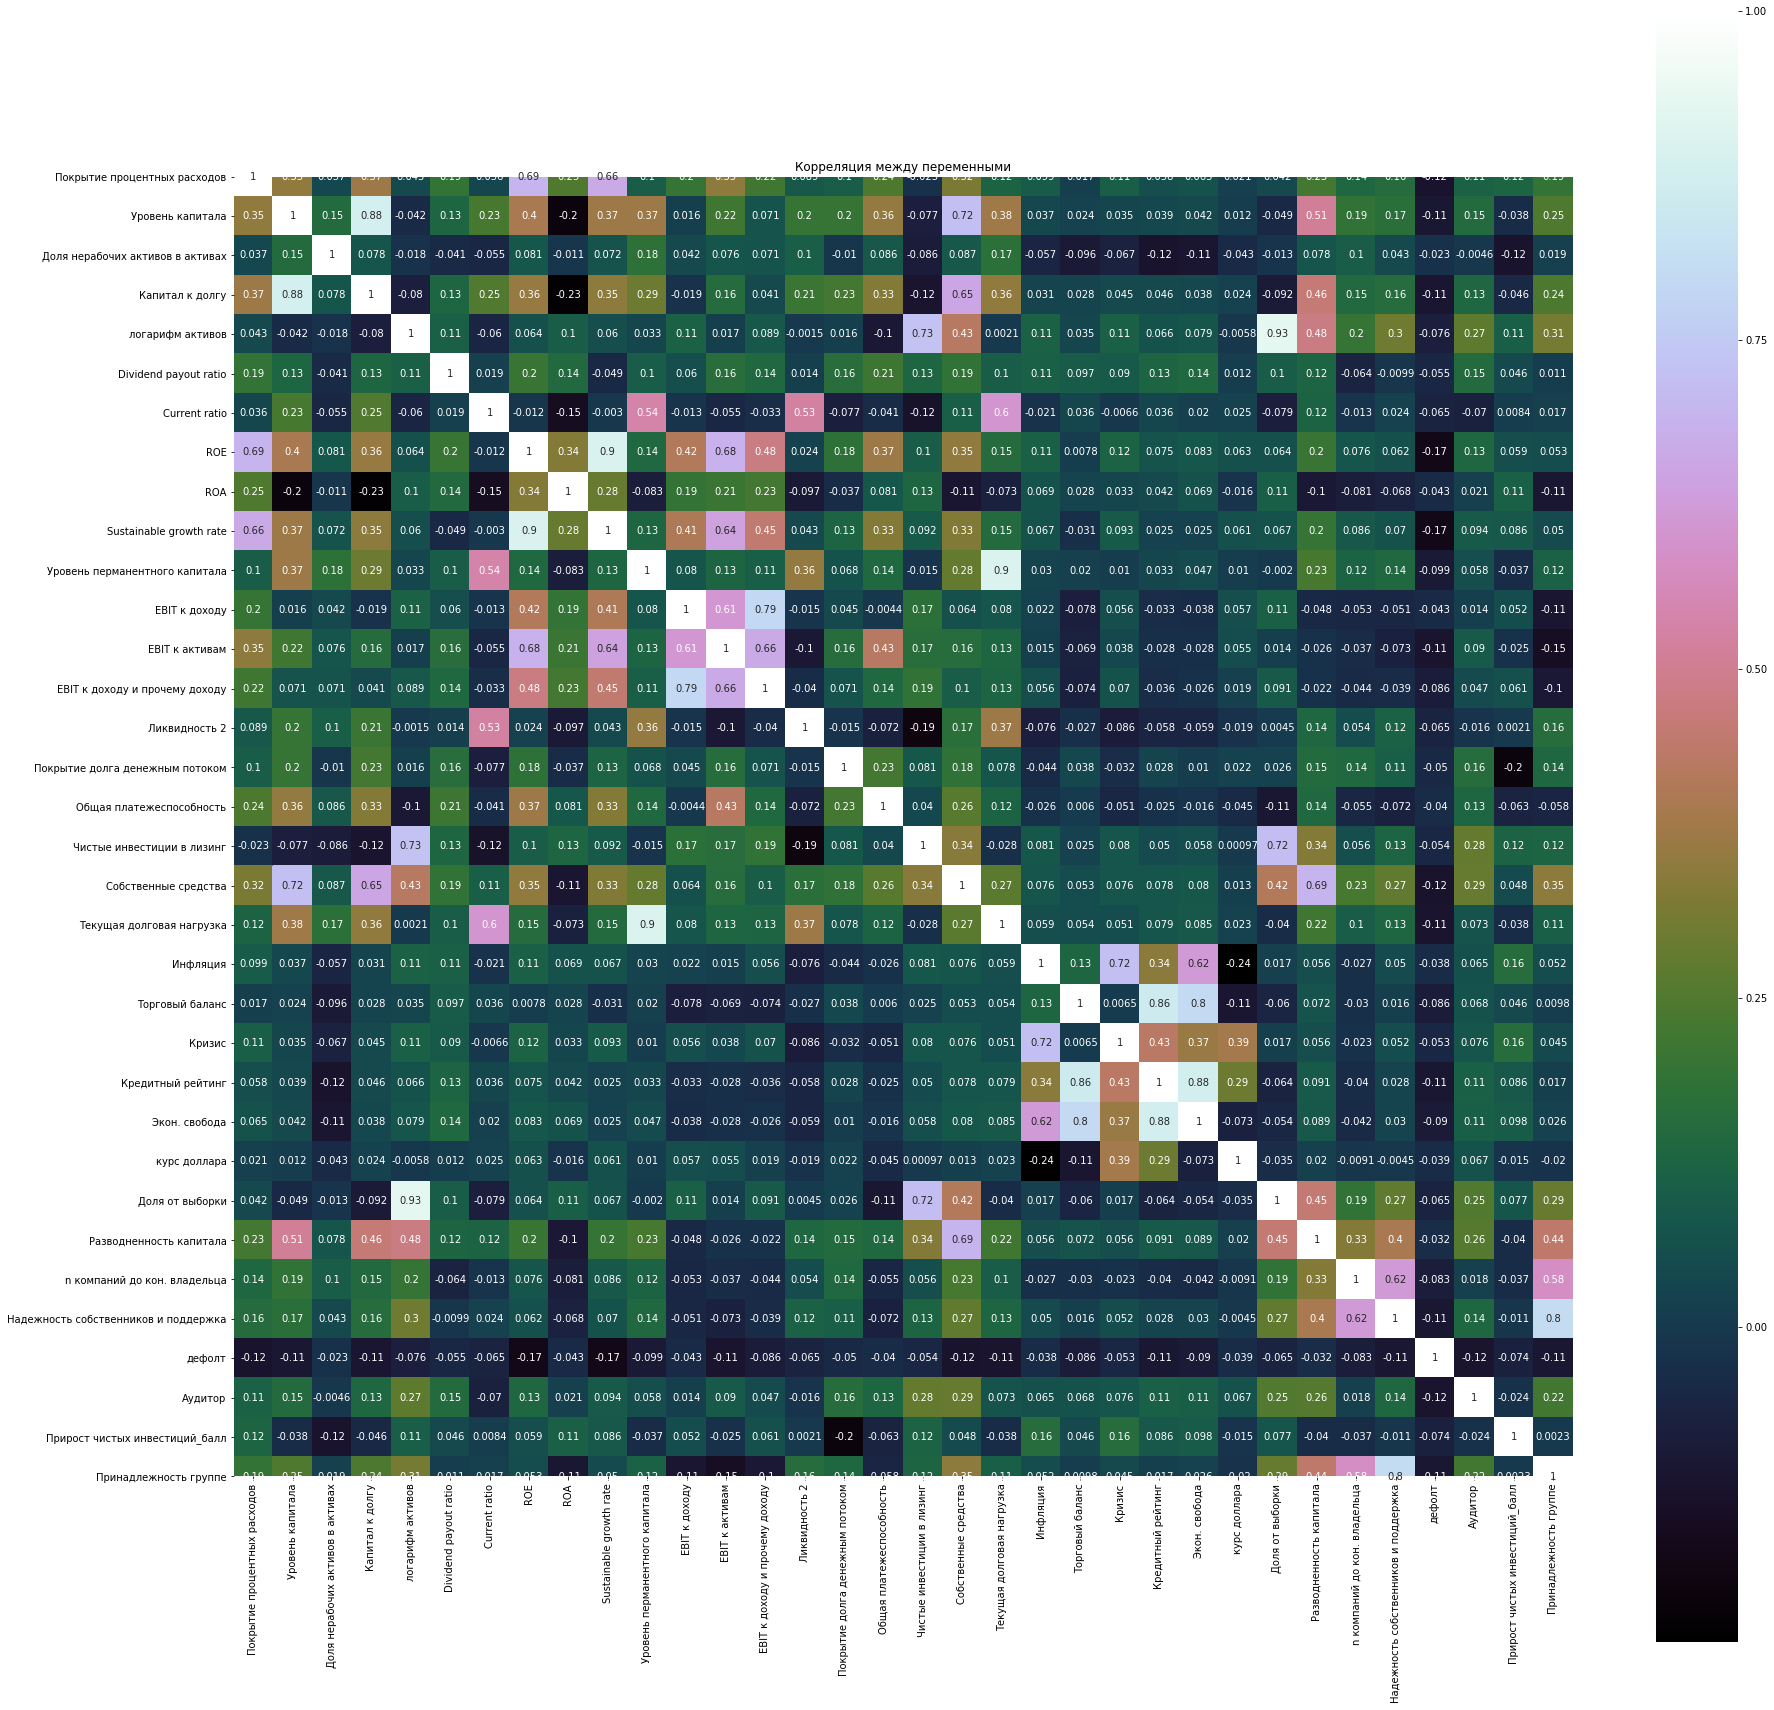

In [2938]:
# Посмотрим корреляции переменных
correlation = Working.astype('float32').corr()
pyplot.figure(figsize=(30,30))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

pyplot.title('Корреляция между переменными')
pyplot.show()

In [2939]:
vif
# Убрали коррелированные, картина получше

,variables,VIF
0,Покрытие процентных расходов,11.917379
1,Доля нерабочих активов в активах,5.154048
2,Капитал к долгу,16.062713
3,логарифм активов,17.946663
4,Dividend payout ratio,1.346061
5,Current ratio,11.978782
6,ROE,21.389425
7,ROA,7.275954
8,EBIT к активам,25.900195
9,EBIT к доходу и прочему доходу,11.454393


In [2940]:
VIF = Working[['Доля нерабочих активов в активах', 'Dividend payout ratio', 'ROA', 'Ликвидность 2', 'Покрытие долга денежным потоком', 'Общая платежеспособность', 'Кредитный рейтинг', 'n компаний до кон. владельца', 'Надежность собственников и поддержка', 'Аудитор', 'Прирост чистых инвестиций_балл']]
vif = pd.DataFrame()
vif["variables"] = VIF.columns
vif["VIF"] = [variance_inflation_factor(VIF.astype(float).values, i) for i in range(len(VIF.columns))]
vif
# Попробуем, где VIF меньше 10 - немного упали (теперь все меньше 6)

,variables,VIF
0,Доля нерабочих активов в активах,4.586403
1,Dividend payout ratio,1.307889
2,ROA,4.868011
3,Ликвидность 2,4.745217
4,Покрытие долга денежным потоком,4.978293
5,Общая платежеспособность,5.635191
6,Кредитный рейтинг,1.707588
7,n компаний до кон. владельца,4.401505
8,Надежность собственников и поддержка,3.157330
9,Аудитор,2.254156


In [2941]:
VIF = Working[['Доля нерабочих активов в активах', 'Dividend payout ratio', 'ROA', 'Ликвидность 2', 'Покрытие долга денежным потоком', 'Общая платежеспособность', 'Кредитный рейтинг', 'n компаний до кон. владельца', 'Надежность собственников и поддержка', 'Аудитор', 'Прирост чистых инвестиций_балл', 'EBIT к доходу и прочему доходу', 'курс доллара', 'Покрытие процентных расходов']]
vif = pd.DataFrame()
vif["variables"] = VIF.columns
vif["VIF"] = [variance_inflation_factor(VIF.astype(float).values, i) for i in range(len(VIF.columns))]
vif
# Оставшиеся VIF получились меньше 7 - отлично

,variables,VIF
0,Доля нерабочих активов в активах,4.747063
1,Dividend payout ratio,1.326608
2,ROA,5.823454
3,Ликвидность 2,4.991025
4,Покрытие долга денежным потоком,5.141195
5,Общая платежеспособность,6.127893
6,Кредитный рейтинг,1.923259
7,n компаний до кон. владельца,4.459969
8,Надежность собственников и поддержка,3.185863
9,Аудитор,2.274117


In [2942]:
Working = Working[['дефолт', 'Доля нерабочих активов в активах', 'Dividend payout ratio', 'ROA', 'Ликвидность 2', 'Покрытие долга денежным потоком', 'Общая платежеспособность', 'Кредитный рейтинг', 'n компаний до кон. владельца', 'Надежность собственников и поддержка', 'Аудитор', 'Прирост чистых инвестиций_балл', 'EBIT к доходу и прочему доходу', 'курс доллара', 'Покрытие процентных расходов']]
Working_test = Working_test[['дефолт', 'Доля нерабочих активов в активах', 'Dividend payout ratio', 'ROA', 'Ликвидность 2', 'Покрытие долга денежным потоком', 'Общая платежеспособность', 'Кредитный рейтинг', 'n компаний до кон. владельца', 'Надежность собственников и поддержка', 'Аудитор', 'Прирост чистых инвестиций_балл', 'EBIT к доходу и прочему доходу', 'курс доллара', 'Покрытие процентных расходов']]

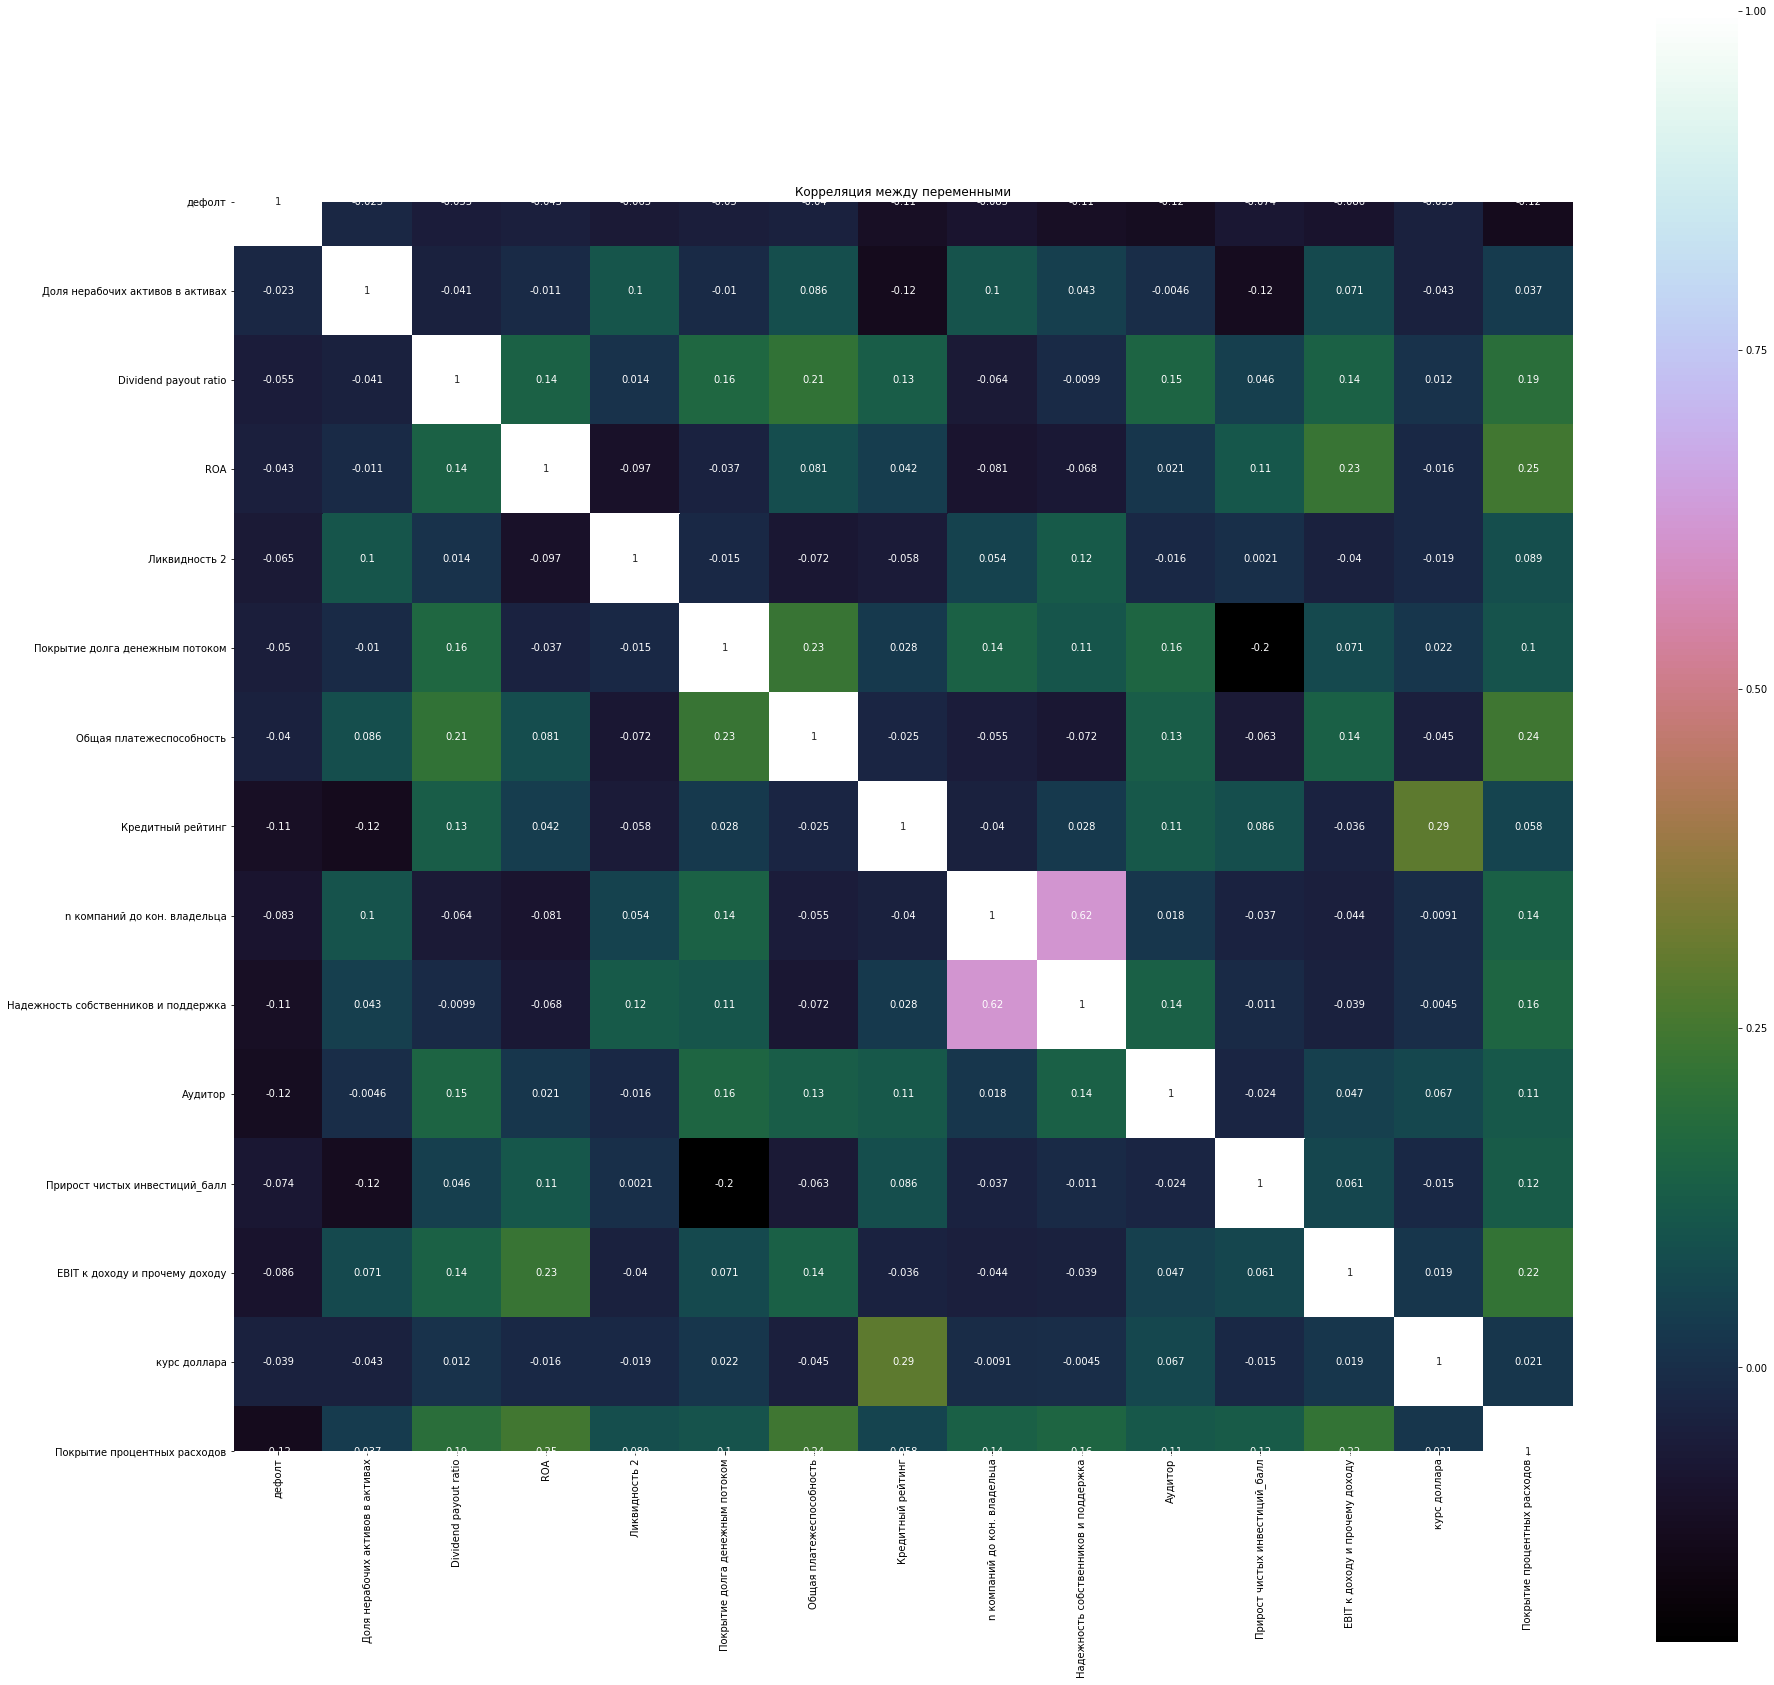

In [2943]:
# Посмотрим корреляции оставшихся переменных
correlation = Working.astype('float32').corr()
pyplot.figure(figsize=(30,30))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

pyplot.title('Корреляция между переменными')
pyplot.show()

In [2944]:
# ANOVA-test о равенстве средних

In [2945]:
ANOVA = pd.DataFrame({'Переменная' : [np.nan],
                      't' : [np.nan],
                      'p-value' : [np.nan]})
for var in list(Working.columns):
    ANOVA = ANOVA.append({'Переменная' : var,
                               't' : scipy.stats.ttest_ind(Working.loc[Working['дефолт'] == 1, var], Working.loc[Working['дефолт'] == 0, var ])[0],
                               'p-value' : scipy.stats.ttest_ind(Working.loc[Working['дефолт'] == 1, var], Working.loc[Working['дефолт'] == 0, var ])[1]}, ignore_index=True)
ANOVA    

,Переменная,t,p-value
0,NaN,NaN,NaN
1,дефолт,inf,0.000000
2,Доля нерабочих активов в активах,-0.652570,0.514221
3,Dividend payout ratio,-1.564695,0.118049
4,ROA,-1.223025,0.221680
5,Ликвидность 2,-1.836679,0.066627
6,Покрытие долга денежным потоком,-1.419239,0.156218
7,Общая платежеспособность,-1.146779,0.251815
8,Кредитный рейтинг,-3.023053,0.002582
9,n компаний до кон. владельца,-2.359036,0.018561


In [2946]:
# Оставляем переменные с p-value менее 0,1 в ANOVA-тесте
final_var = list(ANOVA.loc[ANOVA['p-value'] <= 0.1, 'Переменная'])
Working = Working[final_var]
Working

,дефолт,Ликвидность 2,Кредитный рейтинг,n компаний до кон. владельца,Надежность собственников и поддержка,Аудитор,Прирост чистых инвестиций_балл,EBIT к доходу и прочему доходу,Покрытие процентных расходов
0,0,1.5,2,2,2,1,0.0,1,1.5
1,0,1.5,0,2,1,0,1.0,2,1.5
2,0,0.5,2,2,2,0,0.0,1.5,1.5
3,0,1,2,2,1,0,0.0,1.5,1
4,0,1.5,0,1,1,0,1.0,1,1
...,...,...,...,...,...,...,...,...,...
799,0,0.5,0,1,2,2,1.0,1,1
800,0,1,0,0,0,0,1.0,1,0.5
801,0,1,2,2,2,0,2.0,1.5,1.5
802,0,0,2,0,0,0,0.0,0,0.5


In [2947]:
final_var = list(ANOVA.loc[ANOVA['p-value'] <= 0.1, 'Переменная'])
Working_test = Working_test[final_var]
Working_test

,дефолт,Ликвидность 2,Кредитный рейтинг,n компаний до кон. владельца,Надежность собственников и поддержка,Аудитор,Прирост чистых инвестиций_балл,EBIT к доходу и прочему доходу,Покрытие процентных расходов
0,0,1,2,0,0,1,2.0,2,1
1,0,2,0,2,2,1,0.0,2,2
2,0,2,2,2,2,0,1.0,2,2
3,0,1,0,1,2,0,1.0,2,2
4,0,0.5,0,1,2,2,1.0,2,2
...,...,...,...,...,...,...,...,...,...
264,0,2,0,1,0,1,0.0,0.5,2
265,0,0.5,0,1,2,0,1.0,1,1
266,0,2,0,0,0,0,1.0,2,1
267,0,2,2,1,2,1,0.0,0.5,0


In [2948]:
# Построим регрессию по отобранным переменным и по оцененным коэф-нтам проверим модель на тестовой выборке
logreg = LogisticRegression()
X = np.asarray(Working.iloc[:, 1:])
Y = np.asarray(Working.iloc[:, 0]).ravel()
logreg = logreg.fit(X, Y)
pred = logreg.predict_proba(np.asarray(Working_test.iloc[:, 1:]))
auc = roc_auc_score(np.asarray(Working_test.iloc[:, 0]).ravel(), pred[:, 1])
AR = 2*auc - 1
AR
# AR получился приемлемым, нормальное качество согласно статьям Помазанова

0.4207547169811321

In [2949]:
from scipy import stats
ks = stats.ks_2samp(pred[list(Working_test[Working_test['дефолт'] == 0].index), 1], pred[list(Working_test[Working_test['дефолт'] == 1].index), 1])
ks
# Статистика колмогорова-Смирнова получилась тоже средней, на 10% уровне значимости модель проходит валидацию

Ks_2sampResult(statistic=0.6075471698113207, pvalue=0.06515263875487709)

In [2950]:
# Коэффициенты при переменных
print(logreg.coef_)

[[-0.63443949 -1.24624316 -0.40189656 -0.97902145 -1.26072258 -0.67741386
  -0.95694324 -1.04984198]]


In [2951]:
# Проведем кросс-построение и кросс-валидацию модели
cross_stat = pd.DataFrame()
cross_stat['AR'] = [0]*1000
cross_stat['ks'] = [0]*1000
cross_stat['Ликвидность 2'] = [0]*1000
cross_stat['Кредитный рейтинг'] = [0]*1000
cross_stat['n компаний до кон. владельца'] = [0]*1000
cross_stat['Надежность собственников и поддержка'] = [0]*1000
cross_stat['Аудитор'] = [0]*1000
cross_stat['Прирост чистых инвестиций_балл'] = [0]*1000
cross_stat['EBIT к доходу и прочему доходу'] = [0]*1000
cross_stat['Покрытие процентных расходов'] = [0]*1000
cross_stat['len_test_1'] = [0]*1000
cross_stat['len_test_0'] = [0]*1000


cross = Working.append(Working_test)
cross = cross.reset_index(drop = True)

for i in range (0, 1000):

    crossX_train, crossX_test, crossY_train, crossY_test = train_test_split(cross.iloc[:, 1:], cross['дефолт'], 
                                                        train_size=0.75)
    crossX_train = crossX_train.reset_index(drop = True)
    crossX_test = crossX_test.reset_index(drop = True)
    crossY_train = crossY_train.reset_index(drop = True)
    crossY_test = crossY_test.reset_index(drop = True)

    logreg = LogisticRegression()
    X = np.asarray(crossX_train)
    Y = np.asarray(crossY_train)
    logreg = logreg.fit(X, Y)
    pred = logreg.predict_proba(np.asarray(crossX_test))
    
    try:
        auc = roc_auc_score(crossY_test, pred[:, 1])
        AR = 2*auc - 1

        cross_stat.iloc[i, 0] = AR

        ks = stats.ks_2samp(pred[list(crossY_test[crossY_test == 0].index), 1], pred[list(crossY_test[crossY_test == 1].index), 1])

        cross_stat.iloc[i, 1] = ks[0]

        cross_stat.iloc[i, 2] = logreg.coef_[0, 0]
        cross_stat.iloc[i, 3] = logreg.coef_[0, 1]
        cross_stat.iloc[i, 4] = logreg.coef_[0, 2]
        cross_stat.iloc[i, 5] = logreg.coef_[0, 3]
        cross_stat.iloc[i, 6] = logreg.coef_[0, 4]
        cross_stat.iloc[i, 7] = logreg.coef_[0, 5]
        cross_stat.iloc[i, 8] = logreg.coef_[0, 6]
        cross_stat.iloc[i, 9] = logreg.coef_[0, 7]
        
        cross_stat.iloc[i, 10] = len(list(crossY_test[crossY_test == 1].index))
        cross_stat.iloc[i, 11] = len(list(crossY_test[crossY_test == 0].index))

    
    except:
        continue
    
cross_stat


,AR,ks,Ликвидность 2,Кредитный рейтинг,n компаний до кон. владельца,Надежность собственников и поддержка,Аудитор,Прирост чистых инвестиций_балл,EBIT к доходу и прочему доходу,Покрытие процентных расходов,len_test_1,len_test_0
0,0.847328,0.793893,-0.101317,-0.336515,-0.356386,-0.526277,-0.896530,-0.845431,-0.806414,-1.396608,7,262
1,0.764411,0.834586,-0.349904,-0.508286,-0.455902,-0.590170,-0.991698,-0.735514,-1.191608,-1.239184,3,266
2,0.669697,0.655303,-0.188521,-0.758541,-0.880742,0.056978,-1.289669,-0.914582,-1.081084,-0.874989,5,264
3,0.889724,0.857143,-0.221539,-0.536367,-0.352186,-0.681696,-1.085886,-0.630924,-1.159580,-0.965565,3,266
4,0.872180,0.842105,-0.216213,-0.551677,-0.516464,-0.593834,-1.078298,-0.615171,-1.141225,-0.950289,3,266
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.732210,0.749064,-0.016328,-0.604417,-0.491822,-0.441222,-1.239218,-1.154268,-1.179725,-1.084883,2,267
996,0.543860,0.507519,-0.384180,-0.434165,-0.259325,-0.718407,-1.421924,-1.048262,-0.974056,-0.911802,3,266
997,0.938679,0.939623,-0.268770,-0.576982,-0.199870,-0.404418,-1.105374,-0.541056,-1.275824,-1.089168,4,265
998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0


In [2952]:
# В некоторых симуляциях стоят нули, т.к. в тестовой выборке не попало дефолтов, поэтому мы их не учитываем (ставим, например, ks > 0)
cross_stat.loc[cross_stat['ks'] > 0, :].mean()

AR                                        0.735929
ks                                        0.718179
Ликвидность 2                            -0.300097
Кредитный рейтинг                        -0.657502
n компаний до кон. владельца             -0.411178
Надежность собственников и поддержка     -0.497446
Аудитор                                  -1.158749
Прирост чистых инвестиций_балл           -0.751323
EBIT к доходу и прочему доходу           -1.136163
Покрытие процентных расходов             -1.056186
len_test_1                                4.249243
len_test_0                              264.750757
dtype: float64

In [2953]:
# len_test - кол-во дефолтов и недефолтов в тестовой выборке (всегда делит по-разному)
cross_stat

,AR,ks,Ликвидность 2,Кредитный рейтинг,n компаний до кон. владельца,Надежность собственников и поддержка,Аудитор,Прирост чистых инвестиций_балл,EBIT к доходу и прочему доходу,Покрытие процентных расходов,len_test_1,len_test_0
0,0.847328,0.793893,-0.101317,-0.336515,-0.356386,-0.526277,-0.896530,-0.845431,-0.806414,-1.396608,7,262
1,0.764411,0.834586,-0.349904,-0.508286,-0.455902,-0.590170,-0.991698,-0.735514,-1.191608,-1.239184,3,266
2,0.669697,0.655303,-0.188521,-0.758541,-0.880742,0.056978,-1.289669,-0.914582,-1.081084,-0.874989,5,264
3,0.889724,0.857143,-0.221539,-0.536367,-0.352186,-0.681696,-1.085886,-0.630924,-1.159580,-0.965565,3,266
4,0.872180,0.842105,-0.216213,-0.551677,-0.516464,-0.593834,-1.078298,-0.615171,-1.141225,-0.950289,3,266
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.732210,0.749064,-0.016328,-0.604417,-0.491822,-0.441222,-1.239218,-1.154268,-1.179725,-1.084883,2,267
996,0.543860,0.507519,-0.384180,-0.434165,-0.259325,-0.718407,-1.421924,-1.048262,-0.974056,-0.911802,3,266
997,0.938679,0.939623,-0.268770,-0.576982,-0.199870,-0.404418,-1.105374,-0.541056,-1.275824,-1.089168,4,265
998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0


In [2954]:
Working = Working.append(Working_test)
Working = Working.reset_index(drop = True)

In [2955]:
# Выведем веса (нормированные)
weights = pd.DataFrame()
weights['переменная'] = Working.columns[1:]
weights['Вес_ненормир.'] = list(cross_stat.loc[cross_stat['ks'] > 0, :].mean()[2:10])
weights['Вес_нормир.'] = weights['Вес_ненормир.'] / weights['Вес_ненормир.'].sum()
weights

,переменная,Вес_ненормир.,Вес_нормир.
0,Ликвидность 2,-0.300097,0.050279
1,Кредитный рейтинг,-0.657502,0.110159
2,n компаний до кон. владельца,-0.411178,0.068890
3,Надежность собственников и поддержка,-0.497446,0.083343
4,Аудитор,-1.158749,0.194139
5,Прирост чистых инвестиций_балл,-0.751323,0.125878
6,EBIT к доходу и прочему доходу,-1.136163,0.190355
7,Покрытие процентных расходов,-1.056186,0.176956


In [2956]:
# Посчитаем балл у переменных
Working['Балл'] = (Working.iloc[:, 1])*(weights['Вес_нормир.'][0]) + (Working.iloc[:, 2])*(weights['Вес_нормир.'][1]) + (Working.iloc[:, 3])*(weights['Вес_нормир.'][2]) + (Working.iloc[:, 4])*(weights['Вес_нормир.'][3]) + (Working.iloc[:, 5])*(weights['Вес_нормир.'][4]) + (Working.iloc[:, 6])*(weights['Вес_нормир.'][5]) + (Working.iloc[:, 7])*(weights['Вес_нормир.'][6]) + (Working.iloc[:, 8])*(weights['Вес_нормир.'][7])

In [2957]:
Working['Балл'].max()

1.7549530552968782

In [2958]:
Working['Балл'].min()

0.0951776774340255

In [2959]:
# Регрессия дефолтов на балл
logreg = LogisticRegression()
X = np.asarray(Working['Балл']).reshape(-1, 1)
Y = np.asarray(Working['дефолт']).ravel()
logreg = logreg.fit(X, Y)
pred = logreg.predict_proba(np.asarray(Working['Балл']).reshape(-1, 1))
auc = roc_auc_score(np.asarray(Working['дефолт']).ravel(), pred[:, 1])
AR = 2*auc - 1
AR

0.8268159536541888

In [2960]:
# Перенесем вероятности дефолта на шкалу
hint = ['0%', '0% - 0.52%', '0.52% - 1.35%', '1.35% - 3.47%', '3.47% - 7.49%', '7.49% - 16.31%', '16.31% - 100%']

prob1 = []
default1 = []
score1 = []
prob2 = []
default2 = []
score2 = []
prob3 = []
default3 = []
score3 = []
prob4 = []
default4 = []
score4 = []
prob5 = []
default5 = []
score5 = []
prob6 = []
default6 = []
score6 = []
prob7 = []
default7 = []
score7 = []


In [2961]:
# Заполним рейтинговые группы наблюдениями, согласно их PD
for i in range(len(pred[:, 1])):
    if pred[:, 1][i] == 0:
        prob1.append(pred[:, 1][i])
        default1.append(Working['дефолт'][i])
        score1.append(Working['Балл'][i])
    if (pred[:, 1][i] > 0) & (pred[:, 1][i] <= 0.52/100):
        prob2.append(pred[:, 1][i])
        default2.append(Working['дефолт'][i])
        score2.append(Working['Балл'][i])
    if (pred[:, 1][i] > 0.52/100) & (pred[:, 1][i] <= 1.35/100):
        prob3.append(pred[:, 1][i])
        default3.append(Working['дефолт'][i])
        score3.append(Working['Балл'][i])
    if (pred[:, 1][i] > 1.35/100) & (pred[:, 1][i] <= 3.47/100):
        prob4.append(pred[:, 1][i])
        default4.append(Working['дефолт'][i])
        score4.append(Working['Балл'][i])
    if (pred[:, 1][i] > 3.47/100) & (pred[:, 1][i] <= 7.49/100):
        prob5.append(pred[:, 1][i])
        default5.append(Working['дефолт'][i])
        score5.append(Working['Балл'][i])
    if (pred[:, 1][i] > 7.49/100) & (pred[:, 1][i] <= 16.31/100):
        prob6.append(pred[:, 1][i])
        default6.append(Working['дефолт'][i])
        score6.append(Working['Балл'][i])
    if pred[:, 1][i] > 16.31/100:
        prob7.append(pred[:, 1][i])
        default1.append(Working['дефолт'][i])
        score7.append(Working['Балл'][i])

In [2962]:
# смотрим на кол-во наблюдений по группам
print(len(prob1))
print(sum(default1))

0
0


In [2963]:
print(len(prob2))
print(sum(default2))

287
0


In [2964]:
print(len(prob3))
print(sum(default3))

368
0


In [2965]:
print(len(prob4))
print(sum(default4))

277
5


In [2966]:
print(len(prob5))
print(sum(default5))

112
6


In [2967]:
print(len(prob6))
print(sum(default6))

29
6


In [2968]:
print(len(prob7))
print(sum(default7))

0
0


In [2969]:
# Заполняем итоговую табличку
Scale = pd.DataFrame()
Scale['группа'] = [1, 2, 3, 4, 5, 6, 7]
Scale['сред.pd'] = [0, sum(prob2)/len(prob2), sum(prob3)/len(prob3), sum(prob4)/len(prob4), sum(prob5)/len(prob5), sum(prob6)/len(prob6), 0]
Scale['макс.pd'] = [0, max(prob2), max(prob3), max(prob4), max(prob5), max(prob6), 0]
Scale['сред. балл'] = [0, sum(score2)/len(score2), sum(score3)/len(score3), sum(score4)/len(score4), sum(score5)/len(score5), sum(score6)/len(score6), 0]
Scale

,группа,сред.pd,макс.pd,сред. балл
0,1,0.000000,0.000000,0.000000
1,2,0.003000,0.005193,1.234785
2,3,0.008769,0.013436,0.921441
3,4,0.021776,0.034686,0.675258
4,5,0.047523,0.072989,0.456197
5,6,0.098808,0.159115,0.245599
6,7,0.000000,0.000000,0.000000


In [2970]:
# Определим границы диапазонов баллов (максимальные)
Scale['Граница_макс'] = [2, max(score2), max(score3), max(score4), max(score5), max(score6), 0]
Scale

,группа,сред.pd,макс.pd,сред. балл,Граница_макс
0,1,0.000000,0.000000,0.000000,2.000000
1,2,0.003000,0.005193,1.234785,1.754953
2,3,0.008769,0.013436,0.921441,1.051955
3,4,0.021776,0.034686,0.675258,0.795878
4,5,0.047523,0.072989,0.456197,0.537907
5,6,0.098808,0.159115,0.245599,0.308797
6,7,0.000000,0.000000,0.000000,0.000000


In [2971]:
# ГОТОВО!